In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\Users\Shashank Puttha\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


# import data

In [3]:
df=pd.read_excel('telcom_data.xlsx')
df.head()

Bearer Id               Start  Start ms                 End  \
0  13114483460844900352 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   
1  13114483482878900224 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   
2  13114483484080500736 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   
3  13114483485442799616 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   
4  13114483499480700928 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   

   End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0   662.0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1   606.0  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2   652.0  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3   171.0  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4   954.0  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

  Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0   9164566995485190  ...          15854611.0           2501332.0   
1            L77566A  ...          20247395.0          19111729.0   
2            D42335A  ...          19725661.0          14699576.0   
3            T21824A  ...          21388122.0          15146643.0   
4            D88865A  ...          15259380.0          18962873.0   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0           8198936.0           9656251.0        278082303.0   
1          18338413.0          17227132.0        608750074.0   
2          17587794.0           6163408.0        229584621.0   
3          13994646.0           1097942.0        799538153.0   
4          17124581.0            415218.0        527707248.0   

   Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  \
0         14344150.0       171744450.0         8814393.0        36749741.0   
1          1170709.0       526904238.0        15055145.0        53800391.0   
2           395630.0       410692588.0         4215763.0        27883638.0   
3         10849722.0       749039933.0        12797283.0        43324218.0   
4          3529801.0       550709500.0        13910322.0        38542814.0   

   Total DL (Bytes)  
0       308879636.0  
1       653384965.0  
2       279807335.0  
3       846028530.0  
4       569138589.0  

[5 rows x 55 columns]

# EDA - Exploarty Data Analysis on that data

In [4]:
df.shape

(150001, 55)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [6]:
df.isnull()

Bearer Id  Start  Start ms    End  End ms  Dur. (ms)   IMSI  \
0           False  False     False  False   False      False  False   
1           False  False     False  False   False      False  False   
2           False  False     False  False   False      False  False   
3           False  False     False  False   False      False  False   
4           False  False     False  False   False      False  False   
...           ...    ...       ...    ...     ...        ...    ...   
149996      False  False     False  False   False      False  False   
149997      False  False     False  False   False      False  False   
149998      False  False     False  False   False      False  False   
149999      False  False     False  False   False      False  False   
150000      False   True      True   True    True       True   True   

        MSISDN/Number   IMEI  Last Location Name  ...  Youtube DL (Bytes)  \
0               False  False               False  ...               False   
1               False  False               False  ...               False   
2               False  False               False  ...               False   
3               False  False               False  ...               False   
4               False  False               False  ...               False   
...               ...    ...                 ...  ...                 ...   
149996          False  False               False  ...               False   
149997          False  False               False  ...               False   
149998          False  False               False  ...               False   
149999          False  False               False  ...               False   
150000           True   True                True  ...               False   

        Youtube UL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  \
0                    False               False               False   
1                    False               False               False   
2                    False               False               False   
3                    False               False               False   
4                    False               False               False   
...                    ...                 ...                 ...   
149996               False               False               False   
149997               False               False               False   
149998               False               False               False   
149999               False               False               False   
150000               False               False               False   

        Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
0                   False              False             False   
1                   False              False             False   
2                   False              False             False   
3                   False              False             False   
4                   False              False             False   
...                   ...                ...               ...   
149996              False              False             False   
149997              False              False             False   
149998              False              False             False   
149999              False              False             False   
150000              False              False             False   

        Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
0                  False             False             False  
1                  False             False             False  
2                  False             False             False  
3                  False             False             False  
4                  False             False             False  
...                  ...               ...               ...  
149996             False             False             False  
149997             False             False             False  
149998             False     

<AxesSubplot:>

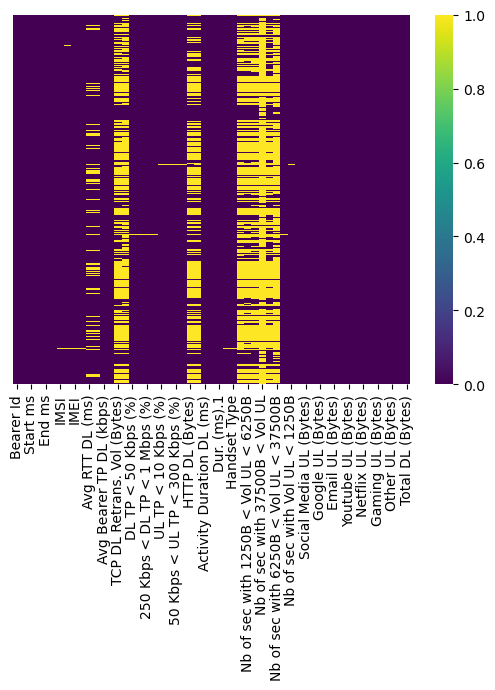

In [7]:
# Heatmap

sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [8]:
df.describe()

Start ms         End ms     Dur. (ms)          IMSI  \
count  150000.000000  150000.000000  1.500000e+05  1.494310e+05   
mean      499.188200     498.800880  1.046086e+05  2.082016e+14   
std       288.611834     288.097653  8.103762e+04  2.148809e+10   
min         0.000000       0.000000  7.142000e+03  2.040471e+14   
25%       250.000000     251.000000  5.744050e+04  2.082014e+14   
50%       499.000000     500.000000  8.639900e+04  2.082015e+14   
75%       749.000000     750.000000  1.324302e+05  2.082018e+14   
max       999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.489350e+05  1.494290e+05    122172.000000    122189.000000   
mean    4.188282e+10  4.847455e+13       109.795706        17.662883   
std     2.447443e+12  2.241637e+13       619.782739        84.793524   
min     3.360100e+10  4.400152e+11         0.000000         0.000000   
25%     3.365130e+10  3.546071e+13        32.000000         2.000000   
50%     3.366371e+10  3.572201e+13        45.000000         5.000000   
75%     3.368349e+10  8.611970e+13        70.000000        15.000000   
max     8.823971e+14  9.900120e+13     96923.000000      7120.000000   

       Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  ...  \
count            150000.000000            150000.000000  ...   
mean              13300.045927              1770.428647  ...   
std               23971.878541              4625.355500  ...   
min                   0.000000                 0.000000  ...   
25%                  43.000000                47.000000  ...   
50%                  63.000000                63.000000  ...   
75%               19710.750000              1120.000000  ...   
max              378160.000000             58613.000000  ...   

       Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
count        1.500010e+05        1.500010e+05        1.500010e+05   
mean         1.163407e+07        1.100941e+07        1.162685e+07   
std          6.710569e+06        6.345423e+06        6.725218e+06   
min          5.300000e+01        1.050000e+02        4.200000e+01   
25%          5.833501e+06        5.517965e+06        5.777156e+06   
50%          1.161602e+07        1.101345e+07        1.164222e+07   
75%          1.744852e+07        1.651556e+07        1.747048e+07   
max          2.325910e+07        2.201196e+07        2.325919e+07   

       Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  \
count        1.500010e+05       1.500010e+05       1.500010e+05   
mean         1.100175e+07       4.220447e+08       8.288398e+06   
std          6.359490e+06       2.439675e+08       4.782700e+06   
min          3.500000e+01       2.516000e+03       5.900000e+01   
25%          5.475981e+06       2.104733e+08       4.128476e+06   
50%          1.099638e+07       4.234081e+08       8.291208e+06   
75%          1.650727e+07       6.331742e+08       1.243162e+07   
max          2.201196e+07       8.434419e+08       1.655879e+07   

       Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
count      1.500010e+05      1.500010e+05      1.500000e+05      1.500000e+05  
mean       4.211005e+08      8.264799e+06      4.112121e+07      4.546434e+08  
std        2.432050e+08      4.769004e+06      1.127639e+07      2.441429e+08  
min        3.290000e+03      1.480000e+02      2.866892e+06      7.114041e+06  
25%        2.101869e+08      4.145943e+06      3.322201e+07      2.431068e+08  
50%        4.218030e+08      8.267071e+06      4.114331e+07      4.558411e+08  
75%        6.316918e+08      1.238415e+07      4.903424e+07      6.657055e+08  
max        8.434425e+08      1.655882e+07      7.833131e+07      9.029696e+08  

[8 rows x 49 columns]

# Remove unwanted Columns

In [9]:
df1=df.drop(["Bearer Id","Last Location Name"],axis=1)
df1.head()

Start  Start ms                 End  End ms  Dur. (ms)  \
0 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   662.0  1823652.0   
1 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   606.0  1365104.0   
2 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   652.0  1361762.0   
3 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   171.0  1321509.0   
4 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   954.0  1089009.0   

           IMSI  MSISDN/Number          IMEI  Avg RTT DL (ms)  \
0  2.082014e+14   3.366496e+10  3.552121e+13             42.0   
1  2.082019e+14   3.368185e+10  3.579401e+13             65.0   
2  2.082003e+14   3.376063e+10  3.528151e+13              NaN   
3  2.082014e+14   3.375034e+10  3.535661e+13              NaN   
4  2.082014e+14   3.369980e+10  3.540701e+13              NaN   

   Avg RTT UL (ms)  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0              5.0  ...          15854611.0           2501332.0   
1              5.0  ...          20247395.0          19111729.0   
2              NaN  ...          19725661.0          14699576.0   
3              NaN  ...          21388122.0          15146643.0   
4              NaN  ...          15259380.0          18962873.0   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0           8198936.0           9656251.0        278082303.0   
1          18338413.0          17227132.0        608750074.0   
2          17587794.0           6163408.0        229584621.0   
3          13994646.0           1097942.0        799538153.0   
4          17124581.0            415218.0        527707248.0   

   Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  \
0         14344150.0       171744450.0         8814393.0        36749741.0   
1          1170709.0       526904238.0        15055145.0        53800391.0   
2           395630.0       410692588.0         4215763.0        27883638.0   
3         10849722.0       749039933.0        12797283.0        43324218.0   
4          3529801.0       550709500.0        13910322.0        38542814.0   

   Total DL (Bytes)  
0       308879636.0  
1       653384965.0  
2       279807335.0  
3       846028530.0  
4       569138589.0  

[5 rows x 53 columns]

# Get the null value percentage for every feature

In [10]:
null_percent=df1.isnull().sum()
print(null_percent.to_string())

Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)                             754
UL TP < 10 Kbps (%)                            792
10 Kbps < UL TP < 50 Kbps (%)  

In [11]:
null_percent=df1.isnull().sum()/df.shape[0]*100
print(null_percent.to_string())

Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%)                0.502663
DL TP > 1 Mbps (%)                           0.502663
UL TP < 10 Kbps (%)         

# Drop Column/Feature

In [12]:
missing_value=null_percent[null_percent>50]
missing_value

TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
HTTP DL (Bytes)                             54.315638
HTTP UL (Bytes)                             54.539636
Nb of sec with 125000B < Vol DL             65.024900
Nb of sec with 1250B < Vol UL < 6250B       61.928920
Nb of sec with 31250B < Vol DL < 125000B    62.390251
Nb of sec with 37500B < Vol UL              86.835421
Nb of sec with 6250B < Vol DL < 31250B      58.877607
Nb of sec with 6250B < Vol UL < 37500B      74.561503
dtype: float64

In [13]:
df1["HTTP DL (Bytes)"].value_counts()

3.629000e+03    266
8.749000e+03    238
4.140000e+02    175
9.200000e+01    157
1.720000e+02    127
               ... 
6.028600e+04      1
7.361000e+04      1
3.207841e+08      1
2.967112e+09      1
1.638899e+07      1
Name: HTTP DL (Bytes), Length: 63527, dtype: int64

# Identifying top 10 handset used by customer

In [14]:
df1["Handset Type"].unique()

array(['Samsung Galaxy A5 Sm-A520F', 'Samsung Galaxy J5 (Sm-J530)',
       'Samsung Galaxy A8 (2018)', ..., 'Asustek Asus Zb500Kg',
       'Huawei Mediapad T5 10 Pro',
       'Shenzhen Jeko Co. Blackview Bv5800 Pro'], dtype=object)

In [15]:
df2=df1["Handset Type"].value_counts().nlargest(10)
df2=pd.DataFrame(df2)
df2

Handset Type
Huawei B528S-23A                     19752
Apple iPhone 6S (A1688)               9419
Apple iPhone 6 (A1586)                9023
undefined                             8987
Apple iPhone 7 (A1778)                6326
Apple iPhone Se (A1723)               5187
Apple iPhone 8 (A1905)                4993
Apple iPhone Xr (A2105)               4568
Samsung Galaxy S8 (Sm-G950F)          4520
Apple iPhone X (A1901)                3813

# Top Handset manufacturer Company

In [16]:
df3=df1["Handset Manufacturer"].value_counts().nlargest(10)
df3=pd.DataFrame(df2)
df3

Handset Type
Huawei B528S-23A                     19752
Apple iPhone 6S (A1688)               9419
Apple iPhone 6 (A1586)                9023
undefined                             8987
Apple iPhone 7 (A1778)                6326
Apple iPhone Se (A1723)               5187
Apple iPhone 8 (A1905)                4993
Apple iPhone Xr (A2105)               4568
Samsung Galaxy S8 (Sm-G950F)          4520
Apple iPhone X (A1901)                3813

In [17]:
df1.columns

Index(['Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 625

# Missing Value Imputation

In [18]:
missing_value_feature=null_percent[null_percent>0]
print(missing_value_feature)
print(len(missing_value_feature))

Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%)                0.502663
DL TP > 1 Mbps (%)                           0.502663
UL TP < 10 Kbps (%)         

In [19]:
int_features=df.select_dtypes(include=["int64"]).columns
print(int_features.shape[0])
print("Integer features names",int_features.to_list())

0
Integer features names []


In [20]:
float_features=df.select_dtypes(include=["float64"]).columns
print(float_features.shape[0])
print("Float features names",float_features.to_list())

49
Float features names ['Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes

In [21]:
cat_features=df.select_dtypes(include=["object"]).columns
print(cat_features.shape[0])
print("Categorical features names",cat_features.to_list())

4
Categorical features names ['Bearer Id', 'Last Location Name', 'Handset Manufacturer', 'Handset Type']


# Categorical , Integer , Float  feature

In [22]:
# float 

float_na_feature=missing_value_feature[missing_value_feature.keys().isin(float_features)]
print(float_na_feature)
print(len(float_na_feature))

Start ms                                     0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%)                0.502663
DL TP > 1 Mbps (%)                           0.502663
UL TP < 10 Kbps (%)                          0.527996
10 Kbps < UL TP < 50 Kbps (%)                0.527996
50 Kbps < UL TP < 300 Kbps (

In [23]:
# int

int_na_feature=missing_value_feature[missing_value_feature.keys().isin(int_features)]
print(int_na_feature)
print(len(int_na_feature))

Series([], dtype: float64)
0


In [24]:
# Categorical

cat_na_feature=missing_value_feature[missing_value_feature.keys().isin(cat_features)]
print(cat_na_feature)
print(len(cat_na_feature))

Handset Manufacturer    0.381331
Handset Type            0.381331
dtype: float64
2


# Handling Missing Value

In [25]:
# backup
df_4=df1.copy()
df1.shape

(150001, 53)

In [26]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 53 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Start                                     150000 non-null  datetime64[ns]
 1   Start ms                                  150000 non-null  float64       
 2   End                                       150000 non-null  datetime64[ns]
 3   End ms                                    150000 non-null  float64       
 4   Dur. (ms)                                 150000 non-null  float64       
 5   IMSI                                      149431 non-null  float64       
 6   MSISDN/Number                             148935 non-null  float64       
 7   IMEI                                      149429 non-null  float64       
 8   Avg RTT DL (ms)                           122172 non-null  float64       
 9   Avg RTT UL (ms)

In [27]:
def percent_missing(df_4):
  total_cells=np.product(df_4.shape)
  missing_count=df_4.isnull().sum()
  total_missing=missing_count.sum()

  print("Total Missing value percentage in Dataset",round(((total_missing/total_cells)*100),2),"%","Missing Value")

percent_missing(df_4)

Total Missing value percentage in Dataset 12.95 % Missing Value


In [28]:
# check missing value in each column
df_4.isnull().sum()

Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)                             754
UL TP < 10 Kbps (%)                            792
10 Kbps < UL TP < 50 Kbps (%)  

In [29]:
null_percent=df1.isnull().sum()/df1.shape[0]*100
print(null_percent.to_string())

Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%)                0.502663
DL TP > 1 Mbps (%)                           0.502663
UL TP < 10 Kbps (%)         

In [30]:
# Droping value greater than 50% of missing data
df_clean1=df1.drop(["TCP DL Retrans. Vol (Bytes)","TCP UL Retrans. Vol (Bytes)","HTTP DL (Bytes)","HTTP UL (Bytes)","Nb of sec with 125000B < Vol DL","Nb of sec with 1250B < Vol UL < 6250B",
                   "Nb of sec with 31250B < Vol DL < 125000B","Nb of sec with 37500B < Vol UL","Nb of sec with 6250B < Vol DL < 31250B","Nb of sec with 6250B < Vol UL < 37500B"],axis=1)
df_clean1.shape

(150001, 43)

In [31]:
df_clean1

Start  Start ms                 End  End ms  Dur. (ms)  \
0      2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   662.0  1823652.0   
1      2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   606.0  1365104.0   
2      2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   652.0  1361762.0   
3      2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   171.0  1321509.0   
4      2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   954.0  1089009.0   
...                    ...       ...                 ...     ...        ...   
149996 2019-04-29 07:28:42     451.0 2019-04-30 06:02:33   214.0    81230.0   
149997 2019-04-29 07:28:42     483.0 2019-04-30 10:41:33   187.0    97970.0   
149998 2019-04-29 07:28:43     283.0 2019-04-30 10:46:12   810.0    98249.0   
149999 2019-04-29 07:28:43     696.0 2019-04-30 10:40:34   327.0    97910.0   
150000                 NaT       NaN                 NaT     NaN        NaN   

                IMSI  MSISDN/Number          IMEI  Avg RTT DL (ms)  \
0       2.082014e+14   3.366496e+10  3.552121e+13             42.0   
1       2.082019e+14   3.368185e+10  3.579401e+13             65.0   
2       2.082003e+14   3.376063e+10  3.528151e+13              NaN   
3       2.082014e+14   3.375034e+10  3.535661e+13              NaN   
4       2.082014e+14   3.369980e+10  3.540701e+13              NaN   
...              ...            ...           ...              ...   
149996  2.082022e+14   3.365069e+10  3.548311e+13             32.0   
149997  2.082019e+14   3.366345e+10  3.566051e+13             27.0   
149998  2.082017e+14   3.362189e+10  3.572121e+13             43.0   
149999  2.082021e+14   3.361962e+10  8.618620e+13             37.0   
150000           NaN            NaN           NaN              NaN   

        Avg RTT UL (ms)  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0                   5.0  ...        1.585461e+07        2.501332e+06   
1                   5.0  ...        2.024740e+07        1.911173e+07   
2                   NaN  ...        1.972566e+07        1.469958e+07   
3                   NaN  ...        2.138812e+07        1.514664e+07   
4                   NaN  ...        1.525938e+07        1.896287e+07   
...                 ...  ...                 ...                 ...   
149996              0.0  ...        1.619167e+07        1.176343e+07   
149997              2.0  ...        1.387723e+07        8.288284e+06   
149998              6.0  ...        2.266051e+07        1.855903e+06   
149999              5.0  ...        8.817106e+06        8.305402e+06   
150000              NaN  ...        1.163407e+07        1.100941e+07   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0             8.198936e+06        9.656251e+06       2.780823e+08   
1             1.833841e+07        1.722713e+07       6.087501e+08   
2             1.758779e+07        6.163408e+06       2.295846e+08   
3             1.399465e+07        1.097942e+06       7.995382e+08   
4             1.712458e+07        4.152180e+05       5.277072e+08   
...                    ...                 ...                ...   
149996        1.788370e+07        1.967816e+07       5.266097e+08   
149997        1.935015e+07        2.129315e+07       6.268931e+08   
149998        9.963942e+06        5.065760e+06       5.535395e+08   
149999        3.322253e+06        1.317259e+07       3.525370e+08   
150000        1.162685e+07        1.100175e+07       4.220447e+08   

        Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
0            1.434415e+07      1.717444e+08      8.814393e+06   
1            1.170709e+06      5.269042e+08      1.505514e+07   
2            3.956300e+05      4.106926e+08      4.215763e+06   
3            1.084972e+07      7.490399e+08      1.279728e+07   
4            3.529801e+06      5.507095e+08      1.391032e+07   
...                   ...               ...               ...   
149996       9.197207e+06      3.264510e+06      1.348742e+07   
149997       4.73

In [32]:
null_percent=df_clean1.isnull().sum()/df_clean1.shape[0]*100
print(null_percent.to_string())

Start                              0.000667
Start ms                           0.000667
End                                0.000667
End ms                             0.000667
Dur. (ms)                          0.000667
IMSI                               0.379997
MSISDN/Number                      0.710662
IMEI                               0.381331
Avg RTT DL (ms)                   18.552543
Avg RTT UL (ms)                   18.541210
Avg Bearer TP DL (kbps)            0.000667
Avg Bearer TP UL (kbps)            0.000667
DL TP < 50 Kbps (%)                0.502663
50 Kbps < DL TP < 250 Kbps (%)     0.502663
250 Kbps < DL TP < 1 Mbps (%)      0.502663
DL TP > 1 Mbps (%)                 0.502663
UL TP < 10 Kbps (%)                0.527996
10 Kbps < UL TP < 50 Kbps (%)      0.527996
50 Kbps < UL TP < 300 Kbps (%)     0.527996
UL TP > 300 Kbps (%)               0.527996
Activity Duration DL (ms)          0.000667
Activity Duration UL (ms)          0.000667
Dur. (ms).1                     

# Handling Start

In [33]:
df_clean1["Start"].value_counts()


2019-04-29 07:08:38    14
2019-04-26 07:29:35    10
2019-04-24 19:16:11    10
2019-04-26 07:39:39     9
2019-04-24 20:48:19     9
                       ..
2019-04-25 17:20:31     1
2019-04-25 17:20:24     1
2019-04-25 17:20:08     1
2019-04-25 17:20:01     1
2019-04-27 00:48:18     1
Name: Start, Length: 111881, dtype: int64

In [34]:
def fix_missing_ffill(df,col):
  df[col]=df[col].fillna(method="ffill")
  return df[col]

def fix_missing_bfill(df,col):
  df[col]=df[col].fillna(method="bfill")
  return df[col]


In [35]:
df_clean1["Start"]=fix_missing_ffill(df_clean1,"Start")

In [36]:
df_clean1["Start"].isnull().sum()

0

# Handling Start ms

In [37]:
df_clean1["Start ms"]=fix_missing_ffill(df_clean1,"Start ms")

In [38]:
df_clean1["Start ms"].isnull().sum()

0

# Handling End


In [39]:
df_clean1["End"]=fix_missing_bfill(df_clean1,"End")

In [40]:
df_clean1["End"].isnull().sum()

1

In [41]:
df_clean1["End"]=fix_missing_ffill(df_clean1,"End")

In [42]:
df_clean1["End"].isnull().sum()

0

# Handling End ms

In [43]:
df_clean1["End ms"]=fix_missing_ffill(df_clean1,"End ms")

In [44]:
df_clean1["End ms"].isnull().sum()

0

# Handling Dur. (ms)

In [45]:
df_clean1["Dur. (ms)"]=fix_missing_ffill(df_clean1,"Dur. (ms)")

In [46]:
df_clean1["Dur. (ms)"].isnull().sum()

0

# Handling IMSI

In [47]:
df_clean1["IMSI"]=fix_missing_bfill(df_clean1,"IMSI")

In [48]:
df_clean1["IMSI"].isnull().sum()

1

In [49]:
df_clean1["IMSI"]=fix_missing_ffill(df_clean1,"IMSI")

In [50]:
df_clean1["IMSI"].isnull().sum()

0

# Handling MSISDN/Number

In [51]:
df4=df_clean1.fillna(df_clean1["MSISDN/Number"].mean())

In [52]:
df_clean1["MSISDN/Number"].isnull().sum()

1066

In [53]:
df_clean1["MSISDN/Number"]=fix_missing_ffill(df_clean1,"MSISDN/Number")

In [54]:
df_clean1["MSISDN/Number"].isnull().sum()

0

# Handling IMEI

In [55]:
df_clean1["IMEI"] = df_clean1["IMEI"].fillna(0)

In [56]:
df_clean1["IMEI"].isnull().sum()

0

# Handling Avg RTT DL (ms)

In [57]:
df_clean1["Avg RTT DL (ms)"]=fix_missing_ffill(df_clean1,"Avg RTT DL (ms)")

In [58]:
df_clean1["Avg RTT DL (ms)"].isnull().sum()

0

# Handling Avg RTT UL (ms)

In [59]:
df_clean1["Avg RTT UL (ms)"]=fix_missing_ffill(df_clean1,"Avg RTT UL (ms)")

In [60]:
df_clean1["Avg RTT UL (ms)"].isnull().sum()

0

# Handling Avg Bearer TP DL (kbps)

In [61]:
df_clean1["Avg Bearer TP DL (kbps)"]=fix_missing_ffill(df_clean1,"Avg Bearer TP DL (kbps)")

In [62]:
df_clean1["Avg Bearer TP DL (kbps)"].isnull().sum()

0

# Handling Avg RTT UL (ms)

In [63]:
df_clean1["Avg Bearer TP UL (kbps)"]=fix_missing_ffill(df_clean1,"Avg Bearer TP UL (kbps)")

In [64]:
df_clean1["Avg Bearer TP UL (kbps)"].isnull().sum()

0

# Handling DL TP < 50 Kbps (%)

In [65]:
df_clean1["DL TP < 50 Kbps (%)"]=fix_missing_ffill(df_clean1,"DL TP < 50 Kbps (%)")

In [66]:
df_clean1["DL TP < 50 Kbps (%)"].isnull().sum()

0

# Handling 50 Kbps < DL TP < 250 Kbps (%)

In [67]:
df_clean1["50 Kbps < DL TP < 250 Kbps (%)"]=fix_missing_ffill(df_clean1,"50 Kbps < DL TP < 250 Kbps (%)")

In [68]:
df_clean1["50 Kbps < DL TP < 250 Kbps (%)"].isnull().sum()

0

# Handling 250 Kbps < DL TP < 1 Mbps (%)

In [69]:
df_clean1["250 Kbps < DL TP < 1 Mbps (%)"]=fix_missing_ffill(df_clean1,"250 Kbps < DL TP < 1 Mbps (%)")

In [70]:
df_clean1["250 Kbps < DL TP < 1 Mbps (%)"].isnull().sum()

0

# Handling DL TP > 1 Mbps (%)

In [71]:
df_clean1["DL TP > 1 Mbps (%)"]=fix_missing_ffill(df_clean1,"DL TP > 1 Mbps (%)")

In [72]:
df_clean1["DL TP > 1 Mbps (%)"].isnull().sum()

0

# Handling UL TP < 10 Kbps (%)

In [73]:
df_clean1["UL TP < 10 Kbps (%)"]=fix_missing_ffill(df_clean1,"UL TP < 10 Kbps (%)")

In [74]:
df_clean1["UL TP < 10 Kbps (%)"].isnull().sum()

0

# Handling 10 Kbps < UL TP < 50 Kbps (%)

In [75]:
df_clean1["10 Kbps < UL TP < 50 Kbps (%)"]=fix_missing_ffill(df_clean1,"10 Kbps < UL TP < 50 Kbps (%)")

In [76]:
df_clean1["10 Kbps < UL TP < 50 Kbps (%)"].isnull().sum()

0

# Handling 50 Kbps < UL TP < 300 Kbps (%)


In [77]:
df_clean1["50 Kbps < UL TP < 300 Kbps (%)"]=fix_missing_ffill(df_clean1,"50 Kbps < UL TP < 300 Kbps (%)")

In [78]:
df_clean1["50 Kbps < UL TP < 300 Kbps (%)"].isnull().sum()

0

# Handling UL TP > 300 Kbps (%)

In [79]:
df_clean1["UL TP > 300 Kbps (%)"]=fix_missing_ffill(df_clean1,"UL TP > 300 Kbps (%)")

In [80]:
df_clean1["UL TP > 300 Kbps (%)"].isnull().sum()

0

# Handling Activity Duration DL (ms)

In [81]:
df_clean1["Activity Duration DL (ms)"]=fix_missing_ffill(df_clean1,"Activity Duration DL (ms)")

In [82]:
df_clean1["Activity Duration DL (ms)"].isnull().sum()

0

# Handling Activity Duration UL (ms)


In [83]:
df_clean1["Activity Duration UL (ms)"]=fix_missing_ffill(df_clean1,"Activity Duration UL (ms)")

In [84]:
df_clean1["Activity Duration UL (ms)"].isnull().sum()

0

# Handling Dur. (ms).1

In [85]:
df_clean1["Dur. (ms).1"]=fix_missing_ffill(df_clean1,"Dur. (ms).1")

In [86]:
df_clean1["Dur. (ms).1"].isnull().sum()

0

# Handling Handset Manufacturer

In [87]:
df_clean1["Handset Manufacturer"]=df_clean1["Handset Manufacturer"].fillna(df_clean1["Handset Manufacturer"].mode()[0])

In [88]:
df_clean1["Handset Manufacturer"].isnull().sum()

0

# Handling Handset Type

In [89]:
df_clean1["Handset Type"]=df_clean1["Handset Type"].fillna(df_clean1["Handset Type"].mode()[0])

In [90]:
df_clean1["Handset Type"].isnull().sum()

0

# Handling Nb of sec with Vol DL < 6250B

In [91]:
df_clean1["Nb of sec with Vol DL < 6250B"]=df_clean1["Nb of sec with Vol DL < 6250B"].fillna(df_clean1["Nb of sec with Vol DL < 6250B"].mode()[0])

In [92]:
df_clean1["Nb of sec with Vol DL < 6250B"].isnull().sum()

0

# Handling Nb of sec with Vol UL < 1250B

In [93]:
df_clean1["Nb of sec with Vol UL < 1250B"]=fix_missing_ffill(df_clean1,"Nb of sec with Vol UL < 1250B")

In [94]:
df_clean1["Nb of sec with Vol UL < 1250B"].isnull().sum()

0

# Handling Total UL (Bytes)

In [95]:
df_clean1["Total UL (Bytes)"]=fix_missing_ffill(df_clean1,"Total UL (Bytes)")

In [96]:
df_clean1["Total UL (Bytes)"].isnull().sum()

0

# Handling Total DL (Bytes)


In [97]:
df_clean1["Total DL (Bytes)"]=fix_missing_ffill(df_clean1,"Total DL (Bytes)")

In [98]:
df_clean1["Total DL (Bytes)"].isnull().sum()

0

In [99]:
df_clean1["Total DL (Bytes)"]=fix_missing_bfill(df_clean1,"Total DL (Bytes)")

In [100]:
df_clean1["Total DL (Bytes)"].isnull().sum()

0

In [101]:
df_clean1["Total DL (Bytes)"]=df_clean1["Total DL (Bytes)"].fillna(df_clean1["Total DL (Bytes)"].mode()[0])

In [102]:
df_clean1["Total DL (Bytes)"].isnull().sum()

0

In [103]:
df_clean1.isnull().sum()

Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250B     0
Nb of sec with Vol UL < 1250B     0
Social Media DL (Bytes)     

<AxesSubplot:>

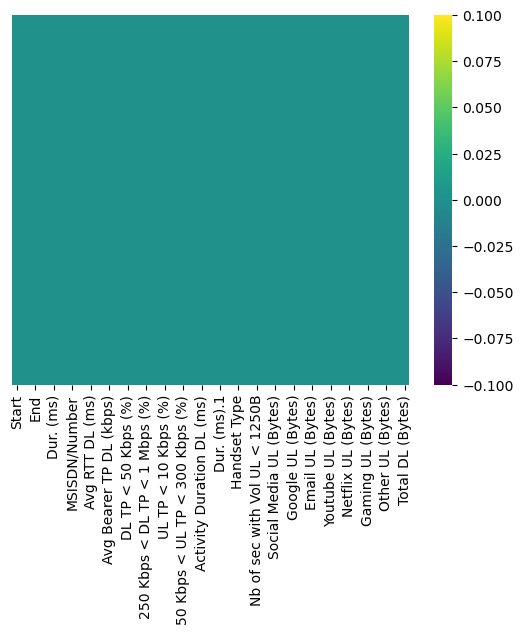

In [104]:
# Heatmap
sns.heatmap(df_clean1.isnull(),yticklabels=False,cmap="viridis")

# Univariate Analysis

## Categorical Feature

### Handset Manufacturer

<AxesSubplot:xlabel='Handset Manufacturer', ylabel='count'>

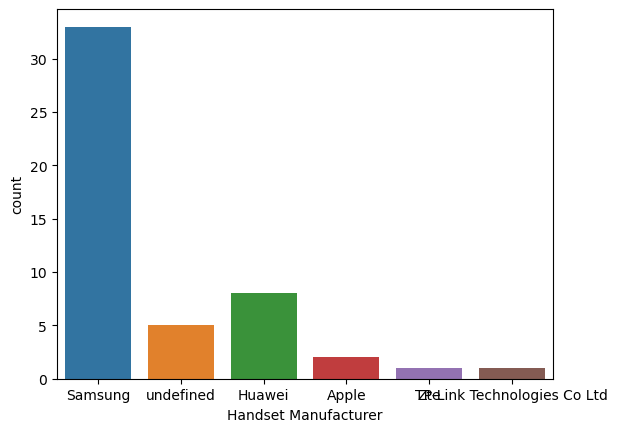

In [105]:
# Find aggregate Handset Manufacturer

sns.countplot(df_clean1["Handset Manufacturer"].head(50))

<AxesSubplot:ylabel='Handset Manufacturer'>

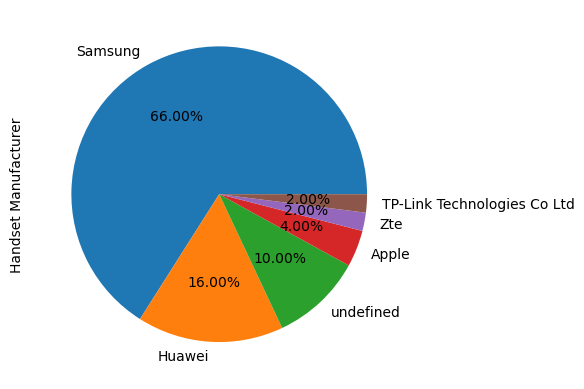

In [106]:
df_clean1["Handset Manufacturer"].head(50).value_counts().plot(kind="pie",autopct="%1.2f%%")

<AxesSubplot:>

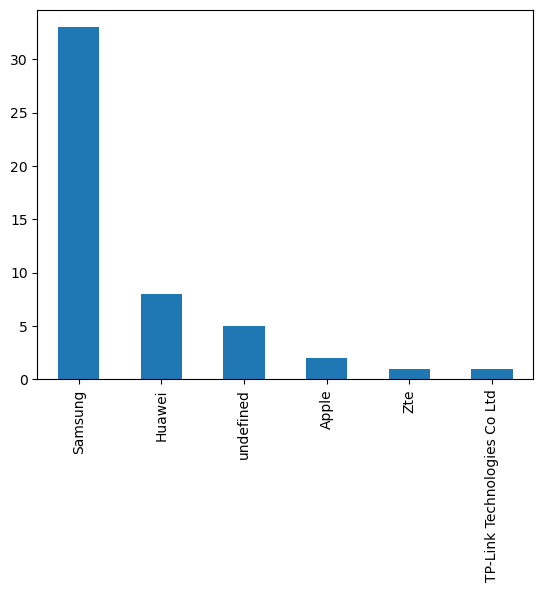

In [107]:
df_clean1["Handset Manufacturer"].head(50).value_counts().plot(kind="bar")

### Handset Type

<AxesSubplot:xlabel='Handset Type', ylabel='count'>

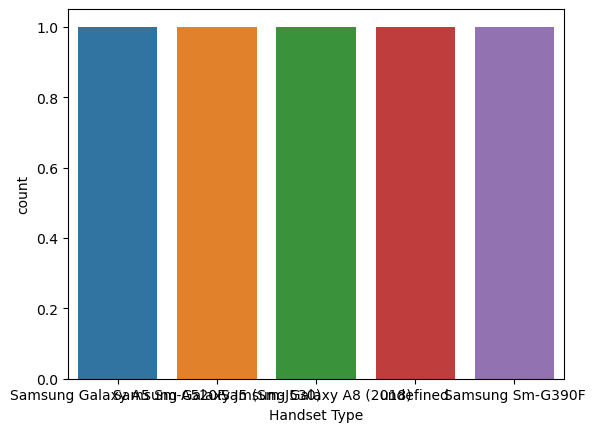

In [108]:
# Find aggregate Handset Manufacturer

sns.countplot(df_clean1["Handset Type"].head(5))

<AxesSubplot:ylabel='Handset Type'>

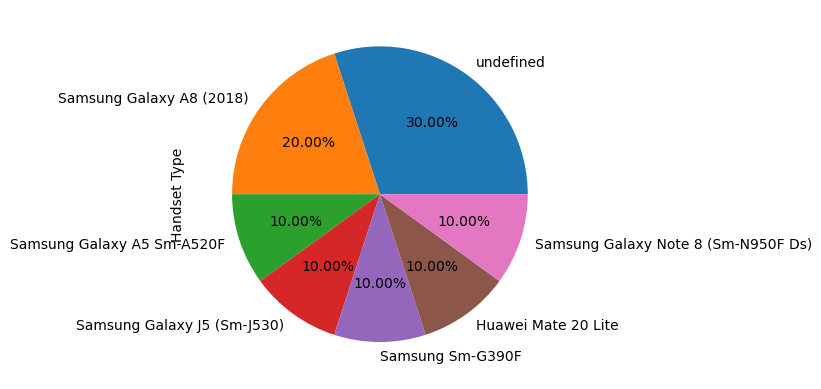

In [109]:
df_clean1["Handset Type"].head(10).value_counts().plot(kind="pie",autopct="%1.2f%%")

<AxesSubplot:>

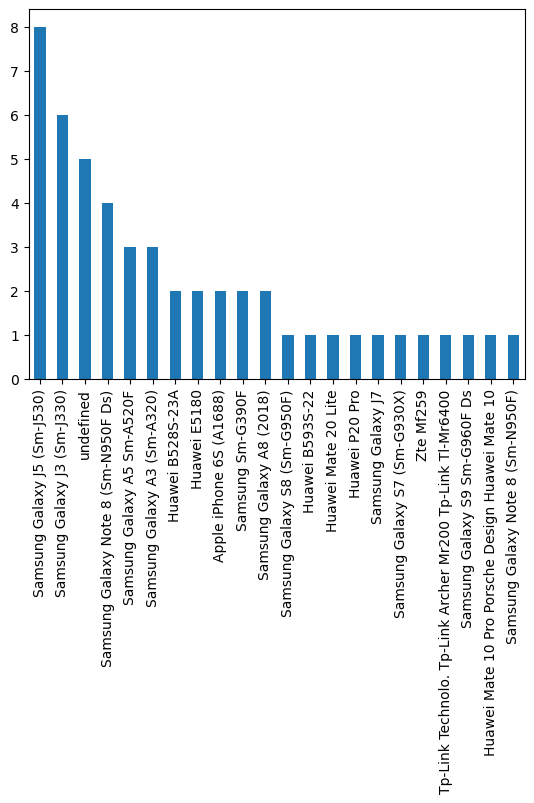

In [110]:
df_clean1["Handset Type"].head(50).value_counts().plot(kind="bar")

## Numerical Features

### Social Media DL (Bytes)

<AxesSubplot:xlabel='Social Media DL (Bytes)', ylabel='Density'>

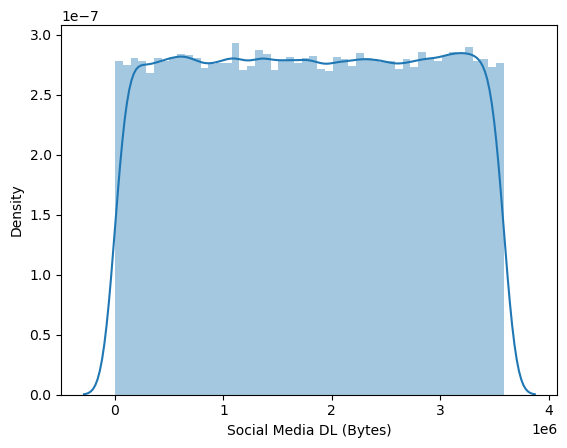

In [111]:
sns.distplot(df_clean1["Social Media DL (Bytes)"])

In [112]:
df_clean1["Social Media DL (Bytes)"].skew()

-0.002136239313678744

### Social Media UL (Bytes)

<AxesSubplot:xlabel='Social Media UL (Bytes)', ylabel='Density'>

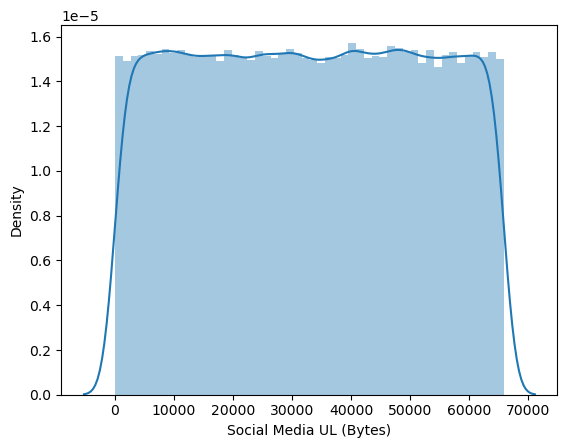

In [113]:
sns.distplot(df_clean1["Social Media UL (Bytes)"])

In [114]:
df_clean1["Social Media UL (Bytes)"].skew()

-0.00035925291932168693

### Google DL (Bytes)

<AxesSubplot:xlabel='Google DL (Bytes)', ylabel='Density'>

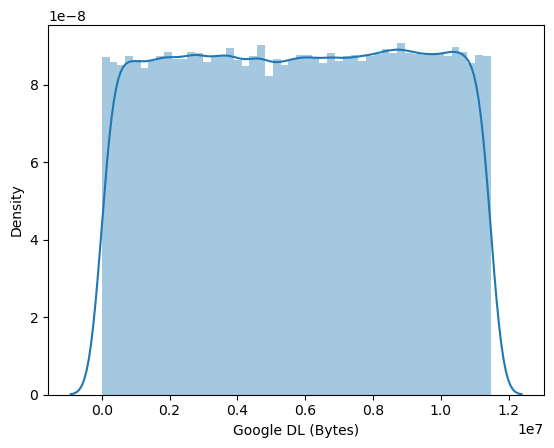

In [115]:
sns.distplot(df_clean1["Google DL (Bytes)"])

In [116]:
df_clean1["Google DL (Bytes)"].skew()

-0.00809234792632722

### Google UL (Bytes)

<AxesSubplot:xlabel='Google UL (Bytes)', ylabel='Density'>

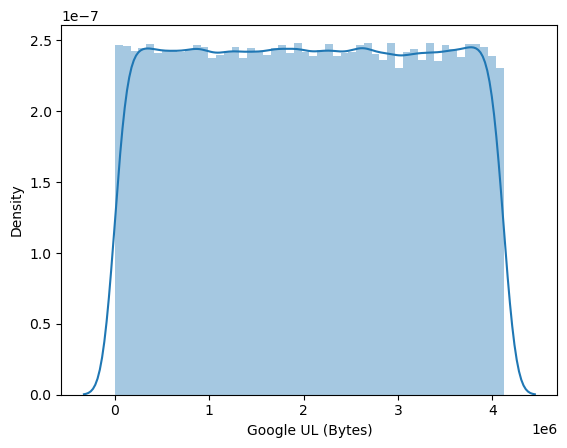

In [117]:
sns.distplot(df_clean1["Google UL (Bytes)"])

In [118]:
df_clean1["Google UL (Bytes)"].skew()

0.0022156581577222954

### Youtube DL (Bytes)

<AxesSubplot:xlabel='Youtube DL (Bytes)', ylabel='Density'>

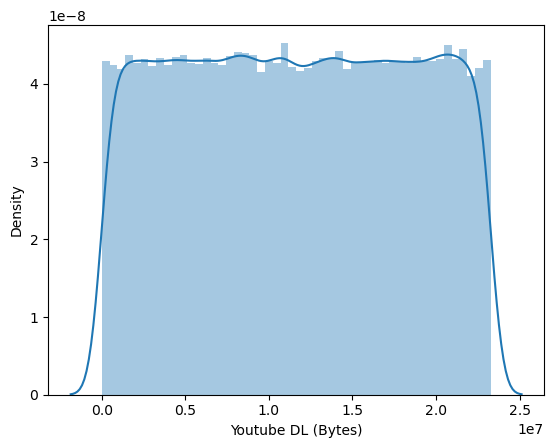

In [119]:
sns.distplot(df_clean1["Youtube DL (Bytes)"])

In [120]:
df_clean1["Youtube DL (Bytes)"].skew()

0.00023117977740596263

### Youtube UL (Bytes)

<AxesSubplot:xlabel='Youtube UL (Bytes)', ylabel='Density'>

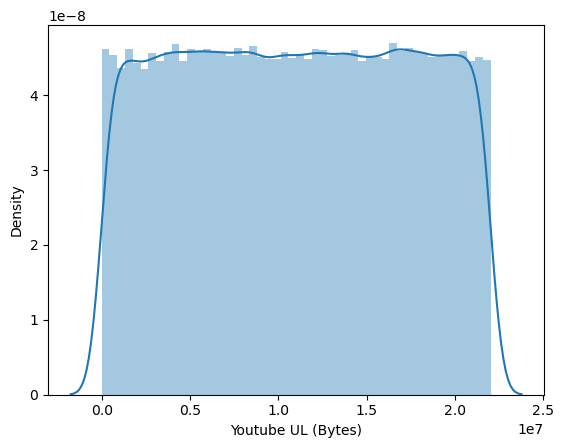

In [121]:
sns.distplot(df_clean1["Youtube UL (Bytes)"])

In [122]:
df_clean1["Youtube UL (Bytes)"].skew()

-0.0011424288125003958

### Other DL (Bytes)

<AxesSubplot:xlabel='Other DL (Bytes)', ylabel='Density'>

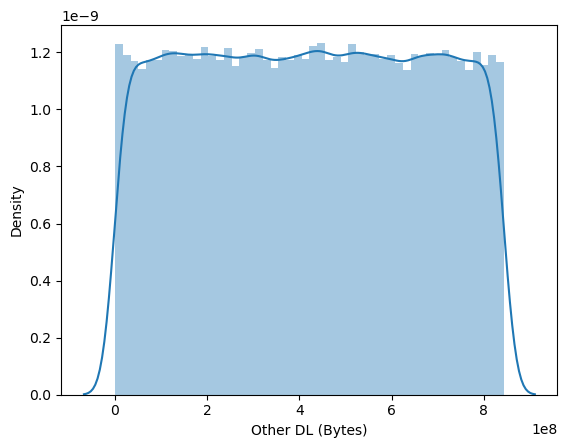

In [123]:
sns.distplot(df_clean1["Other DL (Bytes)"])

In [124]:
df_clean1["Other DL (Bytes)"].skew()

0.0014002337843252303

### Other UL (Bytes)

<AxesSubplot:xlabel='Other UL (Bytes)', ylabel='Density'>

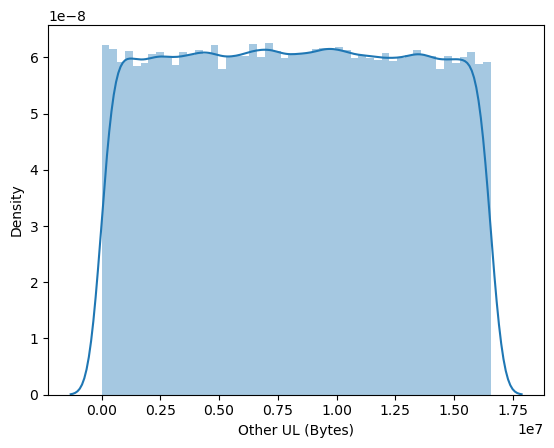

In [125]:
sns.distplot(df_clean1["Other UL (Bytes)"])

In [126]:
df_clean1["Other UL (Bytes)"].skew()

0.0013919082366743007

### Total DL (Bytes)

<AxesSubplot:xlabel='Total DL (Bytes)', ylabel='Density'>

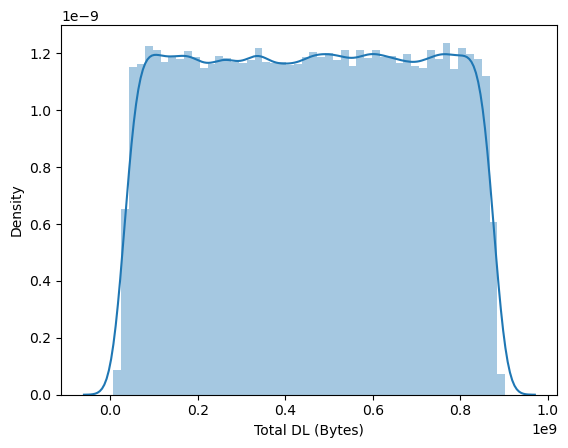

In [127]:
sns.distplot(df_clean1["Total DL (Bytes)"])

In [128]:
df_clean1["Total DL (Bytes)"].skew()

-0.003146851442748234

### Total UL (Bytes)

<AxesSubplot:xlabel='Total UL (Bytes)', ylabel='Density'>

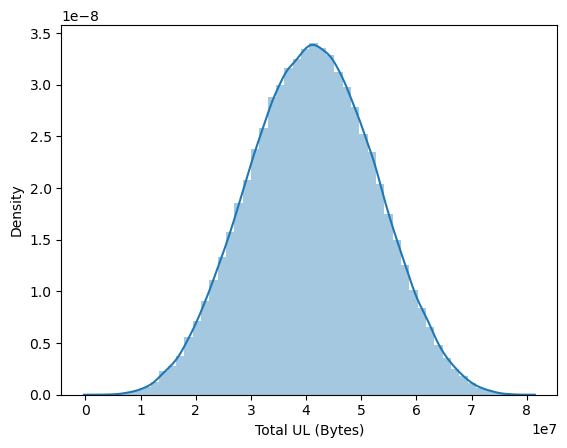

In [129]:
sns.distplot(df_clean1["Total UL (Bytes)"])

In [130]:
df_clean1["Total UL (Bytes)"].skew()

-0.0024426566964420387

### Total DL (Bytes)

<AxesSubplot:xlabel='Total DL (Bytes)'>

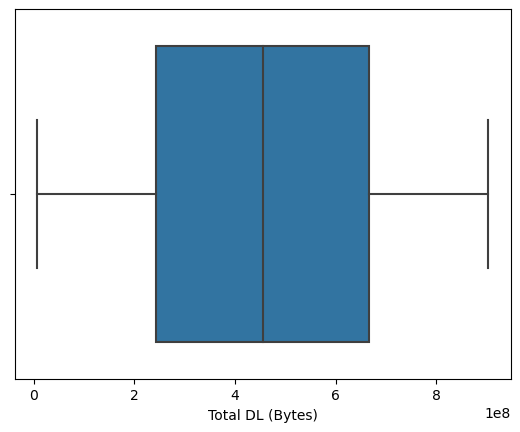

In [131]:
sns.boxplot(df_clean1["Total DL (Bytes)"])

# Bivariate Analysis

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

### Social Media Data Correlation

Text(0, 0.5, 'Social Media UL (Bytes)')

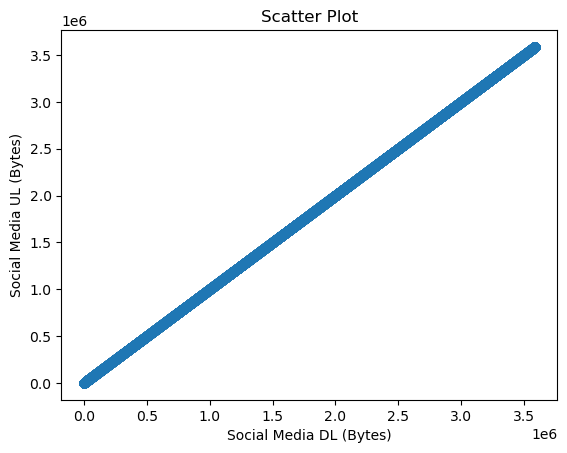

In [133]:
# Scatter plot

plt.scatter(df_clean1["Social Media DL (Bytes)"],df_clean1["Social Media DL (Bytes)"])
plt.title("Scatter Plot")
plt.xlabel("Social Media DL (Bytes)")
plt.ylabel("Social Media UL (Bytes)")

In [134]:
# Correlation Coefficient

Correlation_Coefficient=df_clean1["Social Media DL (Bytes)"].corr(df_clean1["Social Media UL (Bytes)"])
print(Correlation_Coefficient)                        

-0.0005552550605629292


### Google Data Correlation

<AxesSubplot:xlabel='Google UL (Bytes)', ylabel='Google DL (Bytes)'>

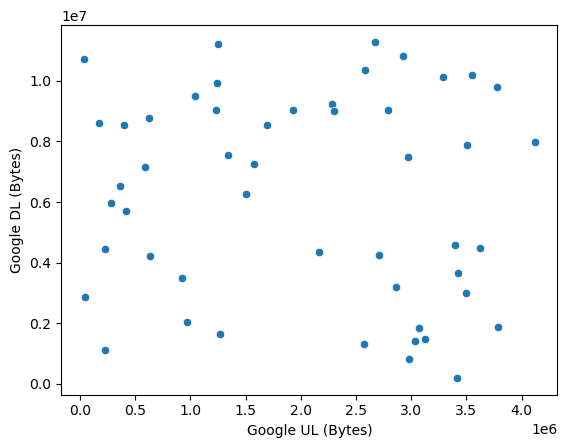

In [135]:
sns.scatterplot(df_clean1["Google UL (Bytes)"].head(50),df_clean1["Google DL (Bytes)"].head(50))

In [136]:
# Correlation Coefficient

Correlation_Coefficient=df_clean1["Google UL (Bytes)"].corr(df_clean1["Google DL (Bytes)"])
print(Correlation_Coefficient)                        

-0.00010337279625522235


### Email Data Correlation

<AxesSubplot:xlabel='Email UL (Bytes)', ylabel='Email DL (Bytes)'>

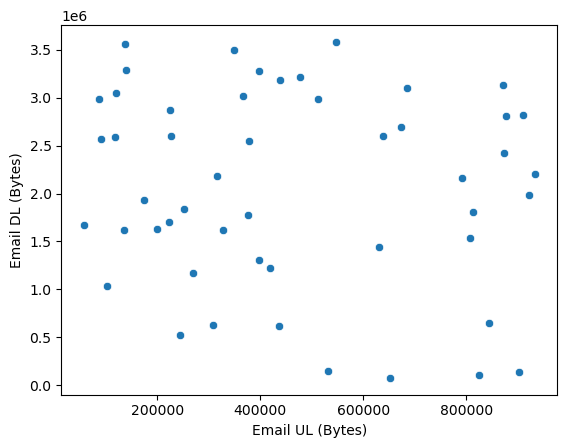

In [137]:
sns.scatterplot(df_clean1["Email UL (Bytes)"].head(50),df_clean1["Email DL (Bytes)"].head(50))

In [138]:
# Correlation Coefficient

Correlation_Coefficient=df_clean1["Email UL (Bytes)"].corr(df_clean1["Email DL (Bytes)"])
print(Correlation_Coefficient)                        

0.0025527051507825468


### Youtube Data Correlation

<AxesSubplot:xlabel='Youtube UL (Bytes)', ylabel='Youtube DL (Bytes)'>

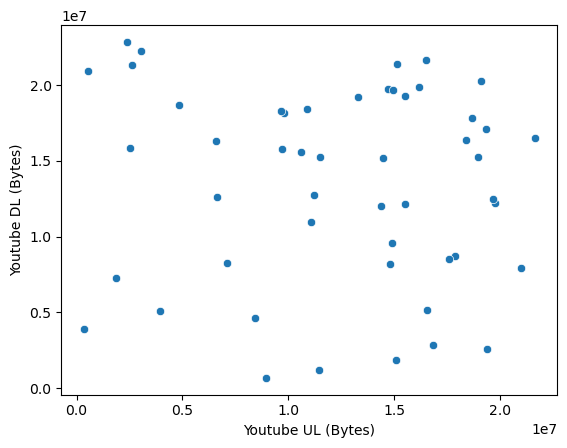

In [139]:
sns.scatterplot(df_clean1["Youtube UL (Bytes)"].head(50),df_clean1["Youtube DL (Bytes)"].head(50))

In [140]:
# Correlation Coefficient

Correlation_Coefficient=df_clean1["Youtube UL (Bytes)"].corr(df_clean1["Youtube DL (Bytes)"])
print(Correlation_Coefficient)                        

0.00243280008648832


### Netflix Data Correlation

<AxesSubplot:xlabel='Netflix UL (Bytes)', ylabel='Netflix DL (Bytes)'>

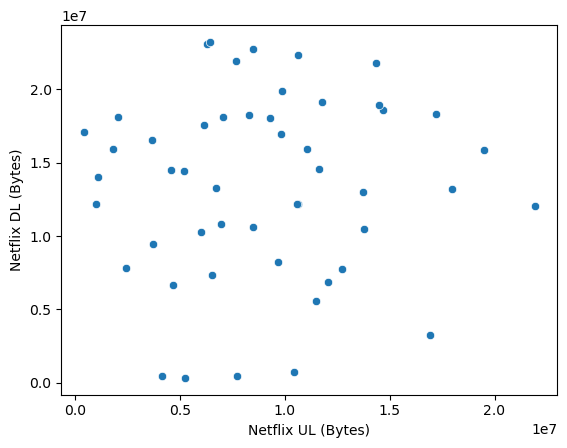

In [141]:
sns.scatterplot(df_clean1["Netflix UL (Bytes)"].head(50),df_clean1["Netflix DL (Bytes)"].head(50))

In [142]:
# Correlation Coefficient

Correlation_Coefficient=df_clean1["Netflix UL (Bytes)"].corr(df_clean1["Netflix DL (Bytes)"])
print(Correlation_Coefficient)                        

0.0010652722724041547


### Gaming Data Correlation

<AxesSubplot:xlabel='Gaming UL (Bytes)', ylabel='Gaming DL (Bytes)'>

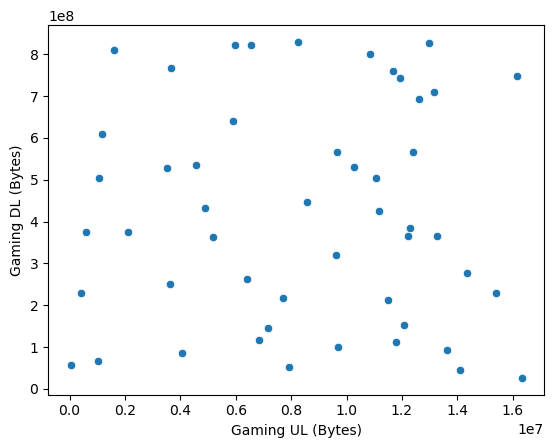

In [143]:
sns.scatterplot(df_clean1["Gaming UL (Bytes)"].head(50),df_clean1["Gaming DL (Bytes)"].head(50))

In [144]:
# Correlation Coefficient

Correlation_Coefficient=df_clean1["Gaming UL (Bytes)"].corr(df_clean1["Gaming DL (Bytes)"])
print(Correlation_Coefficient)                        

0.001161617807230721


### Other Data Correlation

<AxesSubplot:xlabel='Other UL (Bytes)', ylabel='Other DL (Bytes)'>

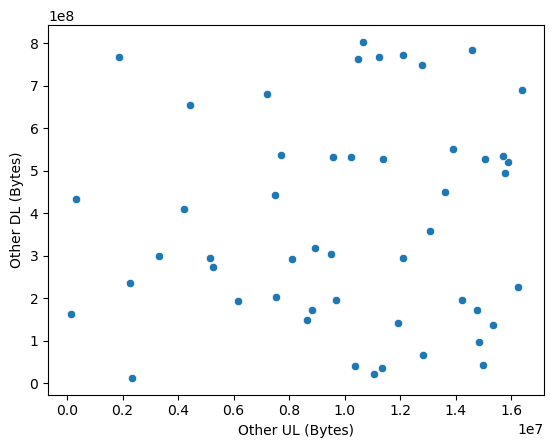

In [145]:
sns.scatterplot(df_clean1["Other UL (Bytes)"].head(50),df_clean1["Other DL (Bytes)"].head(50))

In [146]:
# Correlation Coefficient

Correlation_Coefficient=df_clean1["Other UL (Bytes)"].corr(df_clean1["Other DL (Bytes)"])
print(Correlation_Coefficient)                        

0.003420839439593929


In [147]:
cat_features

Index(['Bearer Id', 'Last Location Name', 'Handset Manufacturer',
       'Handset Type'],
      dtype='object')

In [148]:
int_features

Index([], dtype='object')

In [149]:
float_features

Index(['Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI',
       'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Media DL (

### Categorical to Categorical

<AxesSubplot:xlabel='Handset Manufacturer', ylabel='Handset Type'>

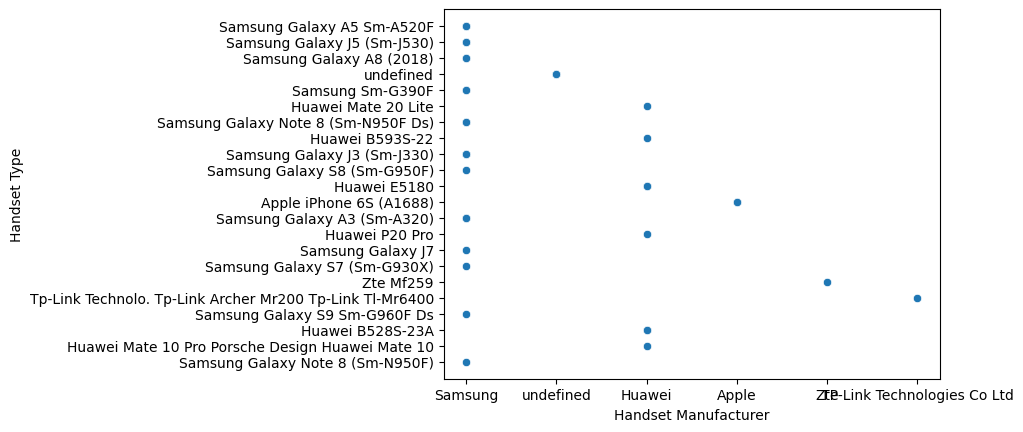

In [150]:
sns.scatterplot(df_clean1["Handset Manufacturer"].head(50),df_clean1["Handset Type"].head(50))

### Numerical to Numerical

<AxesSubplot:xlabel='Total UL (Bytes)', ylabel='Total DL (Bytes)'>

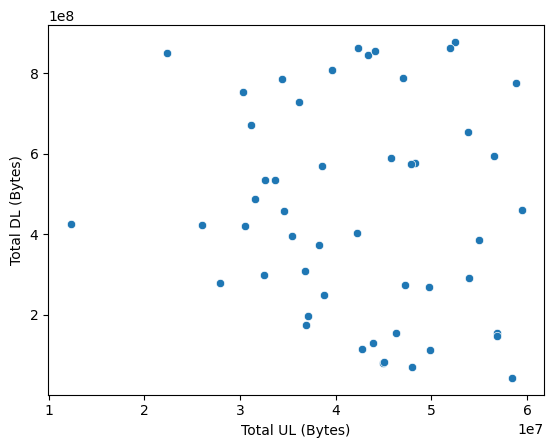

In [151]:
sns.scatterplot(df_clean1["Total UL (Bytes)"].head(50),df_clean1["Total DL (Bytes)"].head(50))

### Numerical to Categorical

<AxesSubplot:xlabel='Total UL (Bytes)', ylabel='Handset Type'>

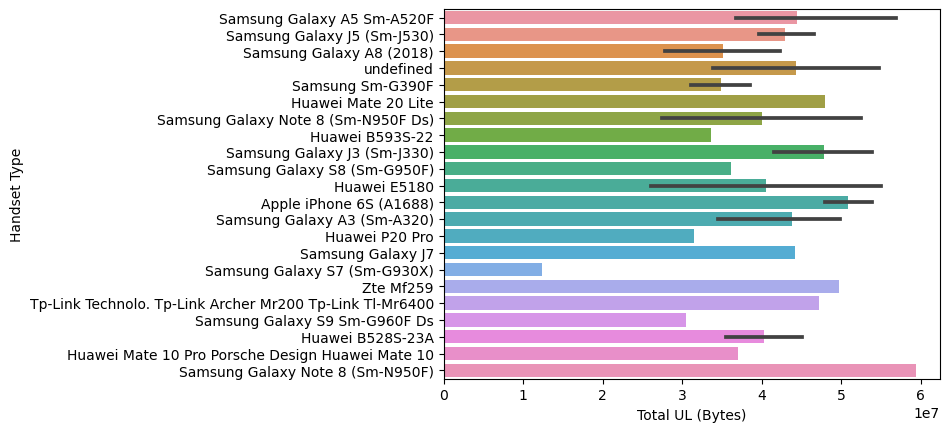

In [152]:
sns.barplot(df_clean1["Total UL (Bytes)"].head(50),df_clean1["Handset Type"].head(50))

<AxesSubplot:xlabel='Total DL (Bytes)', ylabel='Handset Type'>

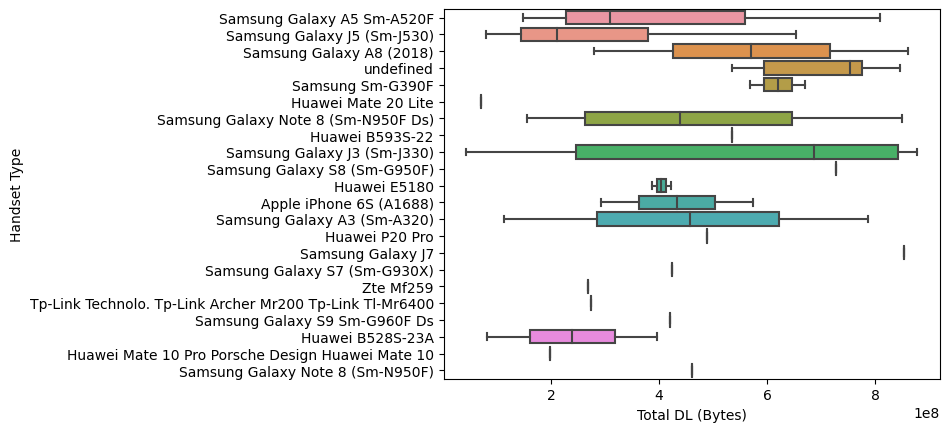

In [153]:
sns.boxplot(df_clean1["Total DL (Bytes)"].head(50),df_clean1["Handset Type"].head(50))

## Cross Tabulation

### Categorical to Categorical

In [154]:
pd.crosstab(df_clean1["Handset Manufacturer"],df_clean1["Handset Type"])

Handset Type                             A-Link Telecom I. Cubot A5  \
Handset Manufacturer                                                  
A-Link Telecom International Co Limited                           1   
ASUSTeK                                                           0   
Acer                                                              0   
Adar                                                              0   
Alif Communications                                               0   
...                                                             ...   
Zebra Technologies Corp.                                          0   
Zte                                                               0   
ZyXEL Communications Corp                                         0   
Zyxel Communications Corp                                         0   
undefined                                                         0   

Handset Type                             A-Link Telecom I. Cubot Note Plus  \
Handset Manufacturer                                                         
A-Link Telecom International Co Limited                                  1   
ASUSTeK                                                                  0   
Acer                                                                     0   
Adar                                                                     0   
Alif Communications                                                      0   
...                                                                    ...   
Zebra Technologies Corp.                                                 0   
Zte                                                                      0   
ZyXEL Communications Corp                                                0   
Zyxel Communications Corp                                                0   
undefined                                                                0   

Handset Type                             A-Link Telecom I. Cubot Note S  \
Handset Manufacturer                                                      
A-Link Telecom International Co Limited                               1   
ASUSTeK                                                               0   
Acer                                                                  0   
Adar                                                                  0   
Alif Communications                                                   0   
...                                                                 ...   
Zebra Technologies Corp.                                              0   
Zte                                                                   0   
ZyXEL Communications Corp                                             0   
Zyxel Communications Corp                                             0   
undefined                                                             0   

Handset Type                             A-Link Telecom I. Cubot Nova  \
Handset Manufacturer                                                    
A-Link Telecom International Co Limited                             1   
ASUSTeK                                                             0   
Acer                                                                0   
Adar                                                                0   
Alif Communications                                                 0   
...                                                               ...   
Zebra Technologies Corp.                                            0   
Zte                                                                 0   
ZyXEL Communications Corp                                           0   
Zyxel Communications Corp                                           0   
undefined                                                           0   

Handset Type                             A-Link Telecom I. Cubot Power  \
Handset Manufacturer                                         

<AxesSubplot:xlabel='Handset Type', ylabel='Handset Manufacturer'>

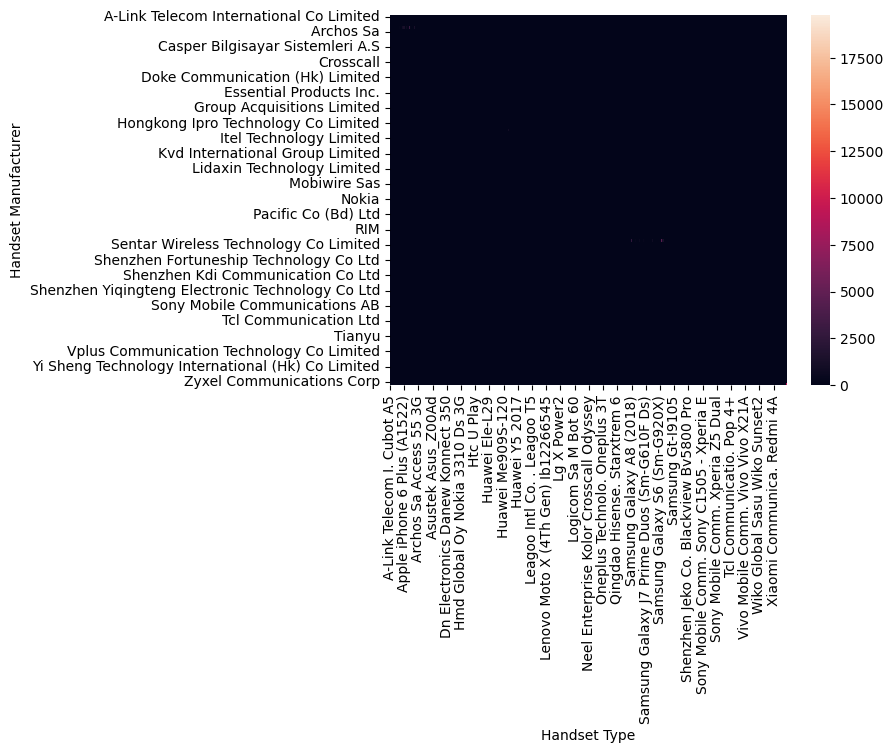

In [155]:
sns.heatmap(pd.crosstab(df_clean1["Handset Manufacturer"],df_clean1["Handset Type"]))

In [156]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Start                           150001 non-null  datetime64[ns]
 1   Start ms                        150001 non-null  float64       
 2   End                             150001 non-null  datetime64[ns]
 3   End ms                          150001 non-null  float64       
 4   Dur. (ms)                       150001 non-null  float64       
 5   IMSI                            150001 non-null  float64       
 6   MSISDN/Number                   150001 non-null  float64       
 7   IMEI                            150001 non-null  float64       
 8   Avg RTT DL (ms)                 150001 non-null  float64       
 9   Avg RTT UL (ms)                 150001 non-null  float64       
 10  Avg Bearer TP DL (kbps)         150001 non-null  float64

# Transforming the data

## Scaling

In [157]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler=MinMaxScaler()
original_data=pd.DataFrame(np.random.exponential(200,size=150002))
original_data.sample(10)

0
146748  230.012996
52549   171.487626
33369    49.814057
112101  646.330474
77658    62.331152
138300   61.857099
139225   87.536395
42129   101.668660
133563   33.489139
13834   297.361473

In [158]:
original_data[0].min(),original_data[0].max

(0.0005975998455803913,
 <bound method NDFrame._add_numeric_operations.<locals>.max of 0          69.507383
 1          23.155133
 2         162.630812
 3         208.962860
 4          86.160004
              ...    
 149997     46.721149
 149998     86.246992
 149999    150.446758
 150000      9.342376
 150001    154.762428
 Name: 0, Length: 150002, dtype: float64>)

(array([1.4158e+04, 1.2686e+04, 1.1422e+04, 1.0463e+04, 9.4430e+03,
        8.5840e+03, 7.7540e+03, 7.1440e+03, 6.3150e+03, 5.6670e+03,
        5.2560e+03, 4.7960e+03, 4.2720e+03, 3.9810e+03, 3.5020e+03,
        3.1680e+03, 2.9540e+03, 2.5970e+03, 2.4470e+03, 2.2130e+03,
        1.9950e+03, 1.7990e+03, 1.6510e+03, 1.4560e+03, 1.3770e+03,
        1.2370e+03, 1.0980e+03, 1.0380e+03, 8.7300e+02, 8.0800e+02,
        6.9900e+02, 6.6600e+02, 5.8500e+02, 5.1700e+02, 4.8500e+02,
        4.5800e+02, 4.4600e+02, 3.7800e+02, 3.1200e+02, 2.8900e+02,
        2.8400e+02, 2.5800e+02, 2.0300e+02, 2.3800e+02, 1.8900e+02,
        1.5300e+02, 1.6600e+02, 1.2600e+02, 1.4500e+02, 1.1900e+02,
        1.0000e+02, 9.4000e+01, 7.5000e+01, 7.3000e+01, 9.0000e+01,
        5.2000e+01, 7.4000e+01, 5.7000e+01, 4.5000e+01, 4.5000e+01,
        3.3000e+01, 3.4000e+01, 4.3000e+01, 3.3000e+01, 1.9000e+01,
        2.8000e+01, 1.2000e+01, 1.9000e+01, 1.8000e+01, 1.6000e+01,
        1.7000e+01, 1.6000e+01, 1.4000e+01, 1.00

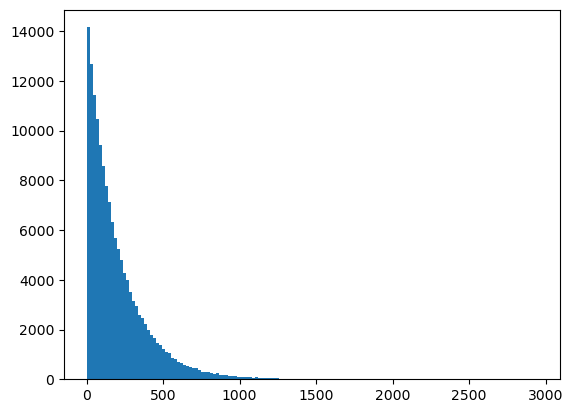

In [159]:
count=plt.hist(original_data,150)
count

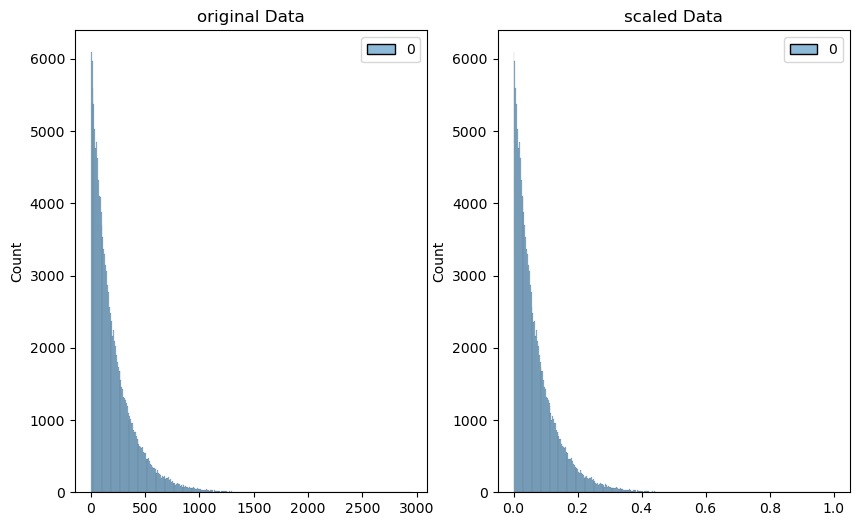

In [160]:
# min-max scale the data beteen 0 and 1

def scaler(df):
  scaled_data = minmax_scaler.fit_transform(df)

  
  fig, ax = plt.subplots(1,2, figsize = (10,6))
  sns.histplot(original_data, ax=ax[0])
  ax[0].set_title("original Data")
  sns.histplot(scaled_data, ax=ax[1])
  ax[1].set_title("scaled Data")

scaler(original_data)

## Normalisation

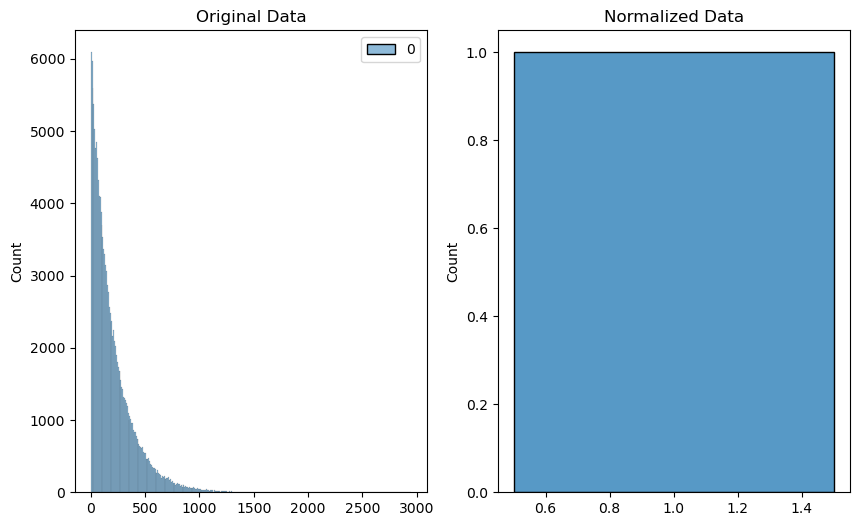

In [161]:
from sklearn.preprocessing import Normalizer

def normalizer(df):
  norm = Normalizer()
  normalized_data = norm.fit_transform(df)

  fig, ax=plt.subplots(1,2, figsize = (10,6))
  sns.histplot(df, ax = ax[0])
  ax[0].set_title('Original Data')
  sns.histplot(normalized_data[0], ax = ax[1])
  ax[1].set_title('Normalized Data')

normalizer(original_data)

In [162]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Start                           150001 non-null  datetime64[ns]
 1   Start ms                        150001 non-null  float64       
 2   End                             150001 non-null  datetime64[ns]
 3   End ms                          150001 non-null  float64       
 4   Dur. (ms)                       150001 non-null  float64       
 5   IMSI                            150001 non-null  float64       
 6   MSISDN/Number                   150001 non-null  float64       
 7   IMEI                            150001 non-null  float64       
 8   Avg RTT DL (ms)                 150001 non-null  float64       
 9   Avg RTT UL (ms)                 150001 non-null  float64       
 10  Avg Bearer TP DL (kbps)         150001 non-null  float64

# One hot Encoding

In [163]:
df_111=df_clean1.copy()
df_111

Start  Start ms                 End  End ms  Dur. (ms)  \
0      2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   662.0  1823652.0   
1      2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   606.0  1365104.0   
2      2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   652.0  1361762.0   
3      2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   171.0  1321509.0   
4      2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   954.0  1089009.0   
...                    ...       ...                 ...     ...        ...   
149996 2019-04-29 07:28:42     451.0 2019-04-30 06:02:33   214.0    81230.0   
149997 2019-04-29 07:28:42     483.0 2019-04-30 10:41:33   187.0    97970.0   
149998 2019-04-29 07:28:43     283.0 2019-04-30 10:46:12   810.0    98249.0   
149999 2019-04-29 07:28:43     696.0 2019-04-30 10:40:34   327.0    97910.0   
150000 2019-04-29 07:28:43     696.0 2019-04-30 10:40:34   327.0    97910.0   

                IMSI  MSISDN/Number          IMEI  Avg RTT DL (ms)  \
0       2.082014e+14   3.366496e+10  3.552121e+13             42.0   
1       2.082019e+14   3.368185e+10  3.579401e+13             65.0   
2       2.082003e+14   3.376063e+10  3.528151e+13             65.0   
3       2.082014e+14   3.375034e+10  3.535661e+13             65.0   
4       2.082014e+14   3.369980e+10  3.540701e+13             65.0   
...              ...            ...           ...              ...   
149996  2.082022e+14   3.365069e+10  3.548311e+13             32.0   
149997  2.082019e+14   3.366345e+10  3.566051e+13             27.0   
149998  2.082017e+14   3.362189e+10  3.572121e+13             43.0   
149999  2.082021e+14   3.361962e+10  8.618620e+13             37.0   
150000  2.082021e+14   3.361962e+10  0.000000e+00             37.0   

        Avg RTT UL (ms)  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0                   5.0  ...        1.585461e+07        2.501332e+06   
1                   5.0  ...        2.024740e+07        1.911173e+07   
2                   5.0  ...        1.972566e+07        1.469958e+07   
3                   5.0  ...        2.138812e+07        1.514664e+07   
4                   5.0  ...        1.525938e+07        1.896287e+07   
...                 ...  ...                 ...                 ...   
149996              0.0  ...        1.619167e+07        1.176343e+07   
149997              2.0  ...        1.387723e+07        8.288284e+06   
149998              6.0  ...        2.266051e+07        1.855903e+06   
149999              5.0  ...        8.817106e+06        8.305402e+06   
150000              5.0  ...        1.163407e+07        1.100941e+07   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0             8.198936e+06        9.656251e+06       2.780823e+08   
1             1.833841e+07        1.722713e+07       6.087501e+08   
2             1.758779e+07        6.163408e+06       2.295846e+08   
3             1.399465e+07        1.097942e+06       7.995382e+08   
4             1.712458e+07        4.152180e+05       5.277072e+08   
...                    ...                 ...                ...   
149996        1.788370e+07        1.967816e+07       5.266097e+08   
149997        1.935015e+07        2.129315e+07       6.268931e+08   
149998        9.963942e+06        5.065760e+06       5.535395e+08   
149999        3.322253e+06        1.317259e+07       3.525370e+08   
150000        1.162685e+07        1.100175e+07       4.220447e+08   

        Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
0            1.434415e+07      1.717444e+08      8.814393e+06   
1            1.170709e+06      5.269042e+08      1.505514e+07   
2            3.956300e+05      4.106926e+08      4.215763e+06   
3            1.084972e+07      7.490399e+08      1.279728e+07   
4            3.529801e+06      5.507095e+08      1.391032e+07   
...                   ...               ...               ...   
149996       9.197207e+06      3.264510e+06      1.348742e+07   
149997       4.73

In [164]:
pd.set_option("display.max_columns",None)

In [165]:
df_encod2=df_clean1.copy()
obj_features=df_clean1.select_dtypes(include=["object"]).columns
print(obj_features.shape[0])
print("Categorical features names",obj_features.to_list())

2
Categorical features names ['Handset Manufacturer', 'Handset Type']


In [166]:
df_encod1=df_clean1.copy()
obj_features=df_clean1.select_dtypes(include=["object"]).columns
print(obj_features.shape[0])
print("Categorical features names",obj_features.to_list())

2
Categorical features names ['Handset Manufacturer', 'Handset Type']


In [167]:
df_encod2=df_clean1.copy()
obj_features=df_clean1.select_dtypes(include=["object"]).columns
print(obj_features.shape[0])
print("Categorical features names",obj_features.to_list())

2
Categorical features names ['Handset Manufacturer', 'Handset Type']


In [168]:
df_encod1[obj_features].head(5)

Handset Manufacturer                 Handset Type
0              Samsung   Samsung Galaxy A5 Sm-A520F
1              Samsung  Samsung Galaxy J5 (Sm-J530)
2              Samsung     Samsung Galaxy A8 (2018)
3            undefined                    undefined
4              Samsung             Samsung Sm-G390F

In [169]:
df_encod1["Handset Manufacturer"].value_counts()

Apple                               60137
Samsung                             40839
Huawei                              34423
undefined                            8987
Sony Mobile Communications Ab         980
                                    ...  
Pt. Arga Mas Lestari                    1
Doke Communication (Hk) Limited         1
Vastking Technology (Hk) Limited        1
Mobiwire Sas                            1
Shenzhen Gaoxinqi                       1
Name: Handset Manufacturer, Length: 170, dtype: int64

In [170]:
import pandas as pd
df_encod2=pd.get_dummies(df_encod2["Handset Manufacturer"],columns="Handset Manufacturer",prefix="Handset Manufacturer",drop_first=False)
df_encod2

Handset Manufacturer_A-Link Telecom International Co Limited  \
0                                                       0              
1                                                       0              
2                                                       0              
3                                                       0              
4                                                       0              
...                                                   ...              
149996                                                  0              
149997                                                  0              
149998                                                  0              
149999                                                  0              
150000                                                  0              

        Handset Manufacturer_ASUSTeK  Handset Manufacturer_Acer  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   
...                              ...                        ...   
149996                             0                          0   
149997                             0                          0   
149998                             0                          0   
149999                             0                          0   
150000                             0                          0   

        Handset Manufacturer_Adar  Handset Manufacturer_Alif Communications  \
0                               0                                         0   
1                               0                                         0   
2                               0                                         0   
3                               0                                         0   
4                               0                                         0   
...                           ...                                       ...   
149996                          0                                         0   
149997                          0                                         0   
149998                          0                                         0   
149999                          0                                         0   
150000                          0                                         0   

        Handset Manufacturer_Apple  Handset Manufacturer_Archos SA  \
0                                0                               0   
1                                0                               0   
2                                0                               0   
3                                0                               0   
4                                0                               0   
...                            ...                             ...   
149996                           1                               0   
149997                           1                               0   
149998                           1                               0   
149999                           0                               0   
150000                           1                               0   

        Handset Manufacturer_Archos Sa  Handset Manufacturer_Asustek  \
0                                    0                             0   
1                                    0                             0   
2                                    0                             0   
3                                    0                             0   
4                                    0                             0   
...                                ...                           ...   
149996                               0      

In [171]:
df_encod1=pd.get_dummies(df_encod1["Handset Type"],columns="Handset Type",prefix="Handset Type",drop_first=False)
df_encod1

Handset Type_A-Link Telecom I. Cubot A5  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   
...                                         ...   
149996                                        0   
149997                                        0   
149998                                        0   
149999                                        0   
150000                                        0   

        Handset Type_A-Link Telecom I. Cubot Note Plus  \
0                                                    0   
1                                                    0   
2                                                    0   
3                                                    0   
4                                                    0   
...                                                ...   
149996                                               0   
149997                                               0   
149998                                               0   
149999                                               0   
150000                                               0   

        Handset Type_A-Link Telecom I. Cubot Note S  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
149996                                            0   
149997                                            0   
149998                                            0   
149999                                            0   
150000                                            0   

        Handset Type_A-Link Telecom I. Cubot Nova  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
...                                           ...   
149996                                          0   
149997                                          0   
149998                                          0   
149999                                          0   
150000                                          0   

        Handset Type_A-Link Telecom I. Cubot Power  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
...                                            ...   
149996                                           0   
149997                                           0   
149998                                           0   
149999                                           0   
150000                                           0   

        Handset Type_A-Link Telecom I. Cubot R9  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   
...                                         ...   
149996                                        0   
149997                                        0   
149998                                        0   
149999                                        0   
150000                                        0   

        Handset Type_A-Link Telecom I. Cubot X18 Plus  \
0                                                   0   
1                       

In [172]:
df_new = pd.concat([df_111, df_encod1], axis=1)

In [173]:
df_new.head()

Start  Start ms                 End  End ms  Dur. (ms)  \
0 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   662.0  1823652.0   
1 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   606.0  1365104.0   
2 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   652.0  1361762.0   
3 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   171.0  1321509.0   
4 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   954.0  1089009.0   

           IMSI  MSISDN/Number          IMEI  Avg RTT DL (ms)  \
0  2.082014e+14   3.366496e+10  3.552121e+13             42.0   
1  2.082019e+14   3.368185e+10  3.579401e+13             65.0   
2  2.082003e+14   3.376063e+10  3.528151e+13             65.0   
3  2.082014e+14   3.375034e+10  3.535661e+13             65.0   
4  2.082014e+14   3.369980e+10  3.540701e+13             65.0   

   Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0              5.0                     23.0                     44.0   
1              5.0                     16.0                     26.0   
2              5.0                      6.0                      9.0   
3              5.0                     44.0                     44.0   
4              5.0                      6.0                      9.0   

   DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
0                100.0                             0.0   
1                100.0                             0.0   
2                100.0                             0.0   
3                100.0                             0.0   
4                100.0                             0.0   

   250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
0                            0.0                 0.0                100.0   
1                            0.0                 0.0                100.0   
2                            0.0                 0.0                100.0   
3                            0.0                 0.0                100.0   
4                            0.0                 0.0                100.0   

   10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
0                            0.0                             0.0   
1                            0.0                             0.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             0.0   

   UL TP > 300 Kbps (%)  Activity Duration DL (ms)  Activity Duration UL (ms)  \
0                   0.0                    37624.0                    38787.0   
1                   0.0                      168.0                     3560.0   
2                   0.0                        0.0                        0.0   
3                   0.0                     3330.0                    37882.0   
4                   0.0                        0.0                        0.0   

    Dur. (ms).1 Handset Manufacturer                 Handset Type  \
0  1.823653e+09              Samsung   Samsung Galaxy A5 Sm-A520F   
1  1.365104e+09              Samsung  Samsung Galaxy J5 (Sm-J530)   
2  1.361763e+09              Samsung     Samsung Galaxy A8 (2018)   
3  1.321510e+09            undefined                    undefined   
4  1.089009e+09              Samsung             Samsung Sm-G390F   

   Nb of sec with Vol DL < 6250B  Nb of sec with Vol UL < 1250B  \
0                          213.0                          214.0   
1                          971.0                         1022.0   
2                          751.0                          695.0   
3                           17.0                          207.0   
4                          607.0                          604.0   

   Social Media DL (Bytes)  Social Media UL (Bytes)  Google DL (Bytes)  \
0                1545765.0                  24420.0          1634479.0   
1                1926113.0                   7165.0          3493924.0   

In [174]:
b

In [175]:
df_new.head()

Start  Start ms                 End  End ms  Dur. (ms)  \
0 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   662.0  1823652.0   
1 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   606.0  1365104.0   
2 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   652.0  1361762.0   
3 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   171.0  1321509.0   
4 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   954.0  1089009.0   

           IMSI  MSISDN/Number          IMEI  Avg RTT DL (ms)  \
0  2.082014e+14   3.366496e+10  3.552121e+13             42.0   
1  2.082019e+14   3.368185e+10  3.579401e+13             65.0   
2  2.082003e+14   3.376063e+10  3.528151e+13             65.0   
3  2.082014e+14   3.375034e+10  3.535661e+13             65.0   
4  2.082014e+14   3.369980e+10  3.540701e+13             65.0   

   Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0              5.0                     23.0                     44.0   
1              5.0                     16.0                     26.0   
2              5.0                      6.0                      9.0   
3              5.0                     44.0                     44.0   
4              5.0                      6.0                      9.0   

   DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
0                100.0                             0.0   
1                100.0                             0.0   
2                100.0                             0.0   
3                100.0                             0.0   
4                100.0                             0.0   

   250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
0                            0.0                 0.0                100.0   
1                            0.0                 0.0                100.0   
2                            0.0                 0.0                100.0   
3                            0.0                 0.0                100.0   
4                            0.0                 0.0                100.0   

   10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
0                            0.0                             0.0   
1                            0.0                             0.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             0.0   

   UL TP > 300 Kbps (%)  Activity Duration DL (ms)  Activity Duration UL (ms)  \
0                   0.0                    37624.0                    38787.0   
1                   0.0                      168.0                     3560.0   
2                   0.0                        0.0                        0.0   
3                   0.0                     3330.0                    37882.0   
4                   0.0                        0.0                        0.0   

    Dur. (ms).1  Nb of sec with Vol DL < 6250B  Nb of sec with Vol UL < 1250B  \
0  1.823653e+09                          213.0                          214.0   
1  1.365104e+09                          971.0                         1022.0   
2  1.361763e+09                          751.0                          695.0   
3  1.321510e+09                           17.0                          207.0   
4  1.089009e+09                          607.0                          604.0   

   Social Media DL (Bytes)  Social Media UL (Bytes)  Google DL (Bytes)  \
0                1545765.0                  24420.0          1634479.0   
1                1926113.0                   7165.0          3493924.0   
2                1684053.0                  42224.0          8535055.0   
3                 644121.0                  13372.0          9023734.0   
4                 862600.0                  50188.0          6248284.0   

   Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  Youtube DL (Bytes)  \
0          1271433.0       

In [176]:
df_new = pd.concat([df_111, df_encod2,df_encod1], axis=1)

In [177]:
df_new.head()

Start  Start ms                 End  End ms  Dur. (ms)  \
0 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   662.0  1823652.0   
1 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   606.0  1365104.0   
2 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   652.0  1361762.0   
3 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   171.0  1321509.0   
4 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   954.0  1089009.0   

           IMSI  MSISDN/Number          IMEI  Avg RTT DL (ms)  \
0  2.082014e+14   3.366496e+10  3.552121e+13             42.0   
1  2.082019e+14   3.368185e+10  3.579401e+13             65.0   
2  2.082003e+14   3.376063e+10  3.528151e+13             65.0   
3  2.082014e+14   3.375034e+10  3.535661e+13             65.0   
4  2.082014e+14   3.369980e+10  3.540701e+13             65.0   

   Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0              5.0                     23.0                     44.0   
1              5.0                     16.0                     26.0   
2              5.0                      6.0                      9.0   
3              5.0                     44.0                     44.0   
4              5.0                      6.0                      9.0   

   DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
0                100.0                             0.0   
1                100.0                             0.0   
2                100.0                             0.0   
3                100.0                             0.0   
4                100.0                             0.0   

   250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
0                            0.0                 0.0                100.0   
1                            0.0                 0.0                100.0   
2                            0.0                 0.0                100.0   
3                            0.0                 0.0                100.0   
4                            0.0                 0.0                100.0   

   10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
0                            0.0                             0.0   
1                            0.0                             0.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             0.0   

   UL TP > 300 Kbps (%)  Activity Duration DL (ms)  Activity Duration UL (ms)  \
0                   0.0                    37624.0                    38787.0   
1                   0.0                      168.0                     3560.0   
2                   0.0                        0.0                        0.0   
3                   0.0                     3330.0                    37882.0   
4                   0.0                        0.0                        0.0   

    Dur. (ms).1 Handset Manufacturer                 Handset Type  \
0  1.823653e+09              Samsung   Samsung Galaxy A5 Sm-A520F   
1  1.365104e+09              Samsung  Samsung Galaxy J5 (Sm-J530)   
2  1.361763e+09              Samsung     Samsung Galaxy A8 (2018)   
3  1.321510e+09            undefined                    undefined   
4  1.089009e+09              Samsung             Samsung Sm-G390F   

   Nb of sec with Vol DL < 6250B  Nb of sec with Vol UL < 1250B  \
0                          213.0                          214.0   
1                          971.0                         1022.0   
2                          751.0                          695.0   
3                           17.0                          207.0   
4                          607.0                          604.0   

   Social Media DL (Bytes)  Social Media UL (Bytes)  Google DL (Bytes)  \
0                1545765.0                  24420.0          1634479.0   
1                1926113.0                   7165.0          3493924.0   

In [196]:
df_new= df_new.drop(['Handset Manufacturer','Handset Type'], axis=1) 

In [197]:
df_new_data=df_new.copy()

# Dimensionality Reduction

In [198]:
df_new_data.head()

Start  Start ms                 End  End ms  Dur. (ms)  \
0 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   662.0  1823652.0   
1 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   606.0  1365104.0   
2 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   652.0  1361762.0   
3 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   171.0  1321509.0   
4 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   954.0  1089009.0   

           IMSI  MSISDN/Number          IMEI  Avg RTT DL (ms)  \
0  2.082014e+14   3.366496e+10  3.552121e+13             42.0   
1  2.082019e+14   3.368185e+10  3.579401e+13             65.0   
2  2.082003e+14   3.376063e+10  3.528151e+13             65.0   
3  2.082014e+14   3.375034e+10  3.535661e+13             65.0   
4  2.082014e+14   3.369980e+10  3.540701e+13             65.0   

   Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0              5.0                     23.0                     44.0   
1              5.0                     16.0                     26.0   
2              5.0                      6.0                      9.0   
3              5.0                     44.0                     44.0   
4              5.0                      6.0                      9.0   

   DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
0                100.0                             0.0   
1                100.0                             0.0   
2                100.0                             0.0   
3                100.0                             0.0   
4                100.0                             0.0   

   250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
0                            0.0                 0.0                100.0   
1                            0.0                 0.0                100.0   
2                            0.0                 0.0                100.0   
3                            0.0                 0.0                100.0   
4                            0.0                 0.0                100.0   

   10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
0                            0.0                             0.0   
1                            0.0                             0.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             0.0   

   UL TP > 300 Kbps (%)  Activity Duration DL (ms)  Activity Duration UL (ms)  \
0                   0.0                    37624.0                    38787.0   
1                   0.0                      168.0                     3560.0   
2                   0.0                        0.0                        0.0   
3                   0.0                     3330.0                    37882.0   
4                   0.0                        0.0                        0.0   

    Dur. (ms).1  Nb of sec with Vol DL < 6250B  Nb of sec with Vol UL < 1250B  \
0  1.823653e+09                          213.0                          214.0   
1  1.365104e+09                          971.0                         1022.0   
2  1.361763e+09                          751.0                          695.0   
3  1.321510e+09                           17.0                          207.0   
4  1.089009e+09                          607.0                          604.0   

   Social Media DL (Bytes)  Social Media UL (Bytes)  Google DL (Bytes)  \
0                1545765.0                  24420.0          1634479.0   
1                1926113.0                   7165.0          3493924.0   
2                1684053.0                  42224.0          8535055.0   
3                 644121.0                  13372.0          9023734.0   
4                 862600.0                  50188.0          6248284.0   

   Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  Youtube DL (Bytes)  \
0          1271433.0       

In [200]:
df_new_data=df_new_data.drop(["Start","End"],axis=1)
df_new_data.head()

Start ms  End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0     770.0   662.0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1     235.0   606.0  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2       1.0   652.0  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3     486.0   171.0  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4     565.0   954.0  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

   Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0             42.0              5.0                     23.0   
1             65.0              5.0                     16.0   
2             65.0              5.0                      6.0   
3             65.0              5.0                     44.0   
4             65.0              5.0                      6.0   

   Avg Bearer TP UL (kbps)  DL TP < 50 Kbps (%)  \
0                     44.0                100.0   
1                     26.0                100.0   
2                      9.0                100.0   
3                     44.0                100.0   
4                      9.0                100.0   

   50 Kbps < DL TP < 250 Kbps (%)  250 Kbps < DL TP < 1 Mbps (%)  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   
3                             0.0                            0.0   
4                             0.0                            0.0   

   DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  10 Kbps < UL TP < 50 Kbps (%)  \
0                 0.0                100.0                            0.0   
1                 0.0                100.0                            0.0   
2                 0.0                100.0                            0.0   
3                 0.0                100.0                            0.0   
4                 0.0                100.0                            0.0   

   50 Kbps < UL TP < 300 Kbps (%)  UL TP > 300 Kbps (%)  \
0                             0.0                   0.0   
1                             0.0                   0.0   
2                             0.0                   0.0   
3                             0.0                   0.0   
4                             0.0                   0.0   

   Activity Duration DL (ms)  Activity Duration UL (ms)   Dur. (ms).1  \
0                    37624.0                    38787.0  1.823653e+09   
1                      168.0                     3560.0  1.365104e+09   
2                        0.0                        0.0  1.361763e+09   
3                     3330.0                    37882.0  1.321510e+09   
4                        0.0                        0.0  1.089009e+09   

   Nb of sec with Vol DL < 6250B  Nb of sec with Vol UL < 1250B  \
0                          213.0                          214.0   
1                          971.0                         1022.0   
2                          751.0                          695.0   
3                           17.0                          207.0   
4                          607.0                          604.0   

   Social Media DL (Bytes)  Social Media UL (Bytes)  Google DL (Bytes)  \
0                1545765.0                  24420.0          1634479.0   
1                1926113.0                   7165.0          3493924.0   
2                1684053.0                  42224.0          8535055.0   
3                 644121.0                  13372.0          9023734.0   
4                 862600.0                  50188.0          6248284.0   

   Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  Youtube DL (Bytes)  \
0          1271433.0         3563542.0          137762.0          15854611.0   
1           920172.0          629046.0          308339.0          20247395.0   
2          1694064.0         2690151.0          672973.0          19725661.0   
3          278

In [201]:
# Stadarize the feature
scalar = StandardScaler() 
scaled_data = pd.DataFrame(scalar.fit_transform(df_new_data)) 
scaled_data

0         1          2         3         4         5         6     \
0       0.938326  0.566479  21.213047 -0.008939 -0.003346 -0.565675 -0.106864   
1      -0.915385  0.372099  15.554552  0.012562 -0.003339 -0.553590 -0.066985   
2      -1.726166  0.531768  15.513311 -0.061795 -0.003307 -0.576295 -0.066985   
3      -0.045700 -1.137814  15.016588 -0.011071 -0.003311 -0.572967 -0.066985   
4       0.228025  1.580029  12.147531 -0.011114 -0.003332 -0.570735 -0.066985   
...          ...       ...        ...       ...       ...       ...       ...   
149996 -0.166971 -0.988558  -0.288492  0.026176 -0.003352 -0.567363 -0.124202   
149997 -0.056095 -1.082277  -0.081919  0.012513 -0.003346 -0.559504 -0.132872   
149998 -0.749071  1.080196  -0.078477  0.003328 -0.003363 -0.556815 -0.105130   
149999  0.681925 -0.596328  -0.082660  0.021509 -0.003364  1.678908 -0.115533   
150000  0.681925 -0.596328  -0.082660  0.021509 -0.003364 -2.139352 -0.115533   

            7         8         9         10        11        12        13    \
0      -0.143589 -0.553859 -0.373253  0.548871 -0.493993 -0.412965 -0.333229   
1      -0.143589 -0.554151 -0.377145  0.548871 -0.493993 -0.412965 -0.333229   
2      -0.143589 -0.554568 -0.380820  0.548871 -0.493993 -0.412965 -0.333229   
3      -0.143589 -0.552983 -0.373253  0.548871 -0.493993 -0.412965 -0.333229   
4      -0.143589 -0.554568 -0.380820  0.548871 -0.493993 -0.412965 -0.333229   
...          ...       ...       ...       ...       ...       ...       ...   
149996 -0.202727 -0.552649 -0.368713  0.548871 -0.493993 -0.412965 -0.333229   
149997 -0.179072 -0.553859 -0.371091  0.548871 -0.493993 -0.412965 -0.333229   
149998 -0.131761 -0.553024 -0.372604  0.548871 -0.493993 -0.412965 -0.333229   
149999 -0.143589 -0.553400 -0.374766  0.548871 -0.493993 -0.412965 -0.333229   
150000 -0.143589 -0.553400 -0.374766  0.548871 -0.493993 -0.412965 -0.333229   

            14        15        16        17        18        19         20    \
0       0.317395 -0.241289 -0.091351 -0.060517 -0.314506 -0.295073  21.213054   
1       0.317395 -0.241289 -0.091351 -0.060517 -0.321082 -0.302660  15.554551   
2       0.317395 -0.241289 -0.091351 -0.060517 -0.321111 -0.303427  15.513314   
3       0.317395 -0.241289 -0.091351 -0.060517 -0.320527 -0.295268  15.016591   
4       0.317395 -0.241289 -0.091351 -0.060517 -0.321111 -0.303427  12.147531   
...          ...       ...       ...       ...       ...       ...        ...   
149996  0.317395 -0.241289 -0.091351 -0.060517 -0.313672 -0.294399  -0.288489   
149997  0.317395 -0.241289 -0.091351 -0.060517 -0.318080 -0.299817  -0.081918   
149998  0.317395 -0.241289 -0.091351 -0.060517 -0.316722 -0.297258  -0.078477   
149999  0.317395 -0.241289 -0.091351 -0.060517 -0.318758 -0.296085  -0.082659   
150000  0.317395 -0.241289 -0.091351 -0.060517 -0.318758 -0.296085  -0.082659   

            21        22        23        24        25        26        27    \
0      -0.381117 -0.375142 -0.241006 -0.447668 -1.243931 -0.659804  1.710515   
1      -0.298296 -0.295979  0.126310 -1.355534 -0.682010 -0.955003 -1.122458   
2      -0.322334 -0.328017 -0.107456  0.489083  0.841411 -0.304626  0.867340   
3      -0.402533 -0.375827 -1.111757 -1.028955  0.989089  0.614738 -0.339798   
4      -0.338068 -0.336932 -0.900764  0.908106  0.150353 -0.467247  0.139759   
...          ...       ...       ...       ...       ...       ...       ...   
149996 -0.380025 -0.373672  1.612445  1.008232  1.274325  0.639349 -1.674097   
149997 -0.392918 -0.386115  0.530427 -1.331963 -1.064141  0.108747  0.157057   
149998 -0.393027 -0.385527 -0.530650 -0.975183 -0.574135  0.569821 -0.256792   
149999 -0.399692 -0.388074 -0.959725 -0.598041 -0.471725  1.269801  0.421438   
150000 -0.404062 -0.388074  0.000000  0.000000  0.000000  0.000000  0.000000   

            28        29        30        31        32        33    \
0      -1.220926  0.628941 -1.340826 -0.509712 -0.211575 -0.590090   
1   

In [202]:
scaled_data.describe()

0             1             2             3             4     \
count  1.500010e+05  1.500010e+05  1.500010e+05  1.500010e+05  1.500010e+05   
mean   3.210744e-18 -6.826346e-17  1.572727e-14 -1.413543e-12  5.618188e-18   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -1.729631e+00 -1.731366e+00 -1.202740e+00 -1.937083e+02 -3.372038e-03   
25%   -8.634115e-01 -8.601288e-01 -5.820362e-01 -1.112155e-02 -3.351423e-03   
50%   -6.566364e-04  4.166198e-03 -2.247060e-01 -4.357830e-03 -3.346327e-03   
75%    8.655631e-01  8.719323e-01  3.433179e-01  6.146542e-03 -3.338229e-03   
max    1.731783e+00  1.736227e+00  2.165339e+01  2.738176e+02  3.618103e+02   

               5             6             7             8             9     \
count  1.500010e+05  1.500010e+05  1.500010e+05  1.500010e+05  1.500010e+05   
mean  -2.586654e-17  9.411771e-15 -7.280420e-16  1.030903e-14 -2.248831e-15   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -2.139352e+00 -1.796853e-01 -2.027272e-01 -5.548181e-01 -3.827658e-01   
25%   -5.689670e-01 -1.259362e-01 -1.790719e-01 -5.530243e-01 -3.726044e-01   
50%   -5.568016e-01 -1.033962e-01 -1.435889e-01 -5.521900e-01 -3.691452e-01   
75%    1.675962e+00 -6.351778e-02 -4.896772e-02  2.673999e-01 -1.406208e-01   
max    2.246644e+00  1.678696e+02  8.401014e+01  1.522042e+01  1.228942e+01   

               10            11            12            13            14    \
count  1.500010e+05  1.500010e+05  1.500010e+05  1.500010e+05  1.500010e+05   
mean   3.388477e-14  5.208170e-14 -4.044167e-14  1.649793e-14 -1.383207e-15   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -7.122321e+00 -4.939929e-01 -4.129647e-01 -3.332293e-01 -2.122601e+01   
25%   -1.415361e-01 -4.939929e-01 -4.129647e-01 -3.332293e-01  1.019614e-01   
50%    5.488712e-01 -4.939929e-01 -4.129647e-01 -3.332293e-01  3.173954e-01   
75%    5.488712e-01  1.493668e-01 -1.723563e-01 -3.332293e-01  3.173954e-01   
max    5.488712e-01  1.446412e+01  2.364788e+01  1.914414e+01  3.173954e-01   

               15            16            17            18            19    \
count  1.500010e+05  1.500010e+05  1.500010e+05  1.500010e+05  1.500010e+05   
mean  -8.661082e-15  4.233886e-15  1.124068e-15 -2.947308e-15 -2.146239e-15   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -2.412890e-01 -9.135061e-02 -6.051726e-02 -3.211112e-01 -3.034266e-01   
25%   -2.412890e-01 -9.135061e-02 -6.051726e-02 -3.184995e-01 -2.987876e-01   
50%   -2.412890e-01 -9.135061e-02 -6.051726e-02 -3.142113e-01 -2.933489e-01   
75%   -2.412890e-01 -9.135061e-02 -6.051726e-02 -2.018053e-01 -1.744016e-01   
max    3.015264e+01  6.149098e+01  7.274269e+01  2.364796e+01  3.090593e+01   

               20            21            22            23            24    \
count  1.500010e+05  1.500010e+05  1.500010e+05  1.500010e+05  1.500010e+05   
mean  -1.673694e-14  3.263531e-16  4.909255e-16 -8.784766e-18  4.828920e-17   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -1.202734e+00 -4.042810e-01 -3.960098e-01 -1.733797e+00 -1.732518e+00   
25%   -5.820423e-01 -3.949937e-01 -3.857226e-01 -8.654680e-01 -8.671122e-01   
50%   -2.247006e-01 -3.824284e-01 -3.747496e-01 -9.201286e-04 -4.437719e-04   
75%    3.433197e-01 -1.194329e-01 -1.541147e-01  8.687925e-01  8.631730e-01   
max    2.165339e+01  6.559699e+01  5.879148e+01  1.729386e+00  1.733209e+00   

               25            26            27            28            29    \
count  1.500010e+05  1.500010e+05  1.500010e+05  1.500010e+05  1.500010e+05   
mean   1.175570e-17  1.934144e-17  5.770938e-17  7.233203e-17 -1.210520e-16   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -1.737805e+00 -1.728310e+00 -1.729728e+00 -1.731208e+00 -1.733692e+00   
25%   -8.668133e-01 -8.675113e-01 -8.678360e-01 -8.667327e-0

In [180]:
df_encod1.shape

(150001, 1396)

# User engagement analysis

### Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric 

In [181]:
import pandas as pd
data= df_clean1.copy()#pd.read_excel('telcom_data.xlsx')
df0=pd.DataFrame(data)
df0["TotalEngagement"]=df0["Total UL (Bytes)"] + df0["Total DL (Bytes)"]
TotalEngagementPerCustomer = df0.groupby('MSISDN/Number')['TotalEngagement'].sum().reset_index()
Top10Customers = TotalEngagementPerCustomer.nlargest(10, 'TotalEngagement')
Top10Customers

MSISDN/Number  TotalEngagement
6437    3.361489e+10     8.846226e+09
92923   3.376054e+10     8.514774e+09
13180   3.362578e+10     8.499621e+09
13526   3.362632e+10     7.971167e+09
76363   3.367588e+10     7.891111e+09
37052   3.365973e+10     7.705863e+09
63028   3.366646e+10     7.308501e+09
92577   3.376041e+10     7.132371e+09
57241   3.366471e+10     6.872018e+09
86455   3.369879e+10     6.540899e+09

### Normalize each engagement metric and run a k-means (k=3) to classify customers into three groups of engagement. 

In [182]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

data=df_clean1.copy()   #pd.read_excel('telcom_data.xlsx')
df01=pd.DataFrame(data)

EngagementMetrics=df01[["Other DL (Bytes)","Total UL (Bytes)","Total DL (Bytes)"]]
scaler = MinMaxScaler()
EngagementNormalized = scaler.fit_transform(EngagementMetrics)

df01Normalized = pd.DataFrame(EngagementNormalized, columns=EngagementMetrics.columns)



In [183]:
# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df01Normalized['Cluster'] = kmeans.fit_predict(EngagementNormalized)

df01Clustered = pd.concat([df01, df01Normalized['Cluster']], axis=1)
df01Clustered

Start  Start ms                 End  End ms  Dur. (ms)  \
0      2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   662.0  1823652.0   
1      2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   606.0  1365104.0   
2      2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   652.0  1361762.0   
3      2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   171.0  1321509.0   
4      2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   954.0  1089009.0   
...                    ...       ...                 ...     ...        ...   
149996 2019-04-29 07:28:42     451.0 2019-04-30 06:02:33   214.0    81230.0   
149997 2019-04-29 07:28:42     483.0 2019-04-30 10:41:33   187.0    97970.0   
149998 2019-04-29 07:28:43     283.0 2019-04-30 10:46:12   810.0    98249.0   
149999 2019-04-29 07:28:43     696.0 2019-04-30 10:40:34   327.0    97910.0   
150000 2019-04-29 07:28:43     696.0 2019-04-30 10:40:34   327.0    97910.0   

                IMSI  MSISDN/Number          IMEI  Avg RTT DL (ms)  \
0       2.082014e+14   3.366496e+10  3.552121e+13             42.0   
1       2.082019e+14   3.368185e+10  3.579401e+13             65.0   
2       2.082003e+14   3.376063e+10  3.528151e+13             65.0   
3       2.082014e+14   3.375034e+10  3.535661e+13             65.0   
4       2.082014e+14   3.369980e+10  3.540701e+13             65.0   
...              ...            ...           ...              ...   
149996  2.082022e+14   3.365069e+10  3.548311e+13             32.0   
149997  2.082019e+14   3.366345e+10  3.566051e+13             27.0   
149998  2.082017e+14   3.362189e+10  3.572121e+13             43.0   
149999  2.082021e+14   3.361962e+10  8.618620e+13             37.0   
150000  2.082021e+14   3.361962e+10  0.000000e+00             37.0   

        Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0                   5.0                     23.0                     44.0   
1                   5.0                     16.0                     26.0   
2                   5.0                      6.0                      9.0   
3                   5.0                     44.0                     44.0   
4                   5.0                      6.0                      9.0   
...                 ...                      ...                      ...   
149996              0.0                     52.0                     65.0   
149997              2.0                     23.0                     54.0   
149998              6.0                     43.0                     47.0   
149999              5.0                     34.0                     37.0   
150000              5.0                     34.0                     37.0   

        DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
0                     100.0                             0.0   
1                     100.0                             0.0   
2                     100.0                             0.0   
3                     100.0                             0.0   
4                     100.0                             0.0   
...                     ...                             ...   
149996                100.0                             0.0   
149997                100.0                             0.0   
149998                100.0                             0.0   
149999                100.0                             0.0   
150000                100.0                             0.0   

        250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  \
0                                 0.0                 0.0   
1                                 0.0                 0.0   
2                                 0.0                 0.0   
3                                 0.0                 0.0   
4                                 0.0                 0.0   
...                               ...                 ...   
149996                            0.0                 0.0   
149997                            0.0                 0.0   


In [184]:
df01Normalized['Cluster']

0         0
1         1
2         0
3         1
4         1
         ..
149996    2
149997    1
149998    2
149999    1
150000    0
Name: Cluster, Length: 150001, dtype: int32

### Compute the minimum, maximum, average & total non-normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.
 

In [185]:
kmeans = KMeans(n_clusters=3, random_state=42)
df01['Cluster'] = kmeans.fit_predict(EngagementMetrics)

compute_min_max_avg_total= df01.groupby('Cluster').agg({
    'Other DL (Bytes)': ['min', 'max', 'mean', 'sum'],
    'Total UL (Bytes)': ['min', 'max', 'mean', 'sum'],
    'Total DL (Bytes)': ['min', 'max', 'mean', 'sum']
}).reset_index()
compute_min_max_avg_total

Cluster Other DL (Bytes)                                           \
                       min          max          mean           sum   
0       0           3290.0  436379989.0  1.994510e+08  9.258115e+12   
1       1          63396.0  843442489.0  4.117331e+08  2.326292e+13   
2       2      419686632.0  843438544.0  6.508605e+08  3.064447e+13   

  Total UL (Bytes)                                         Total DL (Bytes)  \
               min         max          mean           sum              min   
0        4469240.0  77458132.0  4.110002e+07  1.907781e+12      255745435.0   
1        5276726.0  77390291.0  4.117143e+07  2.326186e+12        7114041.0   
2        2866892.0  78331311.0  4.108159e+07  1.934244e+12      215530595.0   

                                            
           max          mean           sum  
0  897998249.0  6.187087e+08  2.871922e+13  
1  463915181.0  1.980238e+08  1.118835e+13  
2  902969616.0  6.008393e+08  2.828932e+13

### Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [186]:
data=df_clean1.copy()
df01 = pd.DataFrame(data)

Total_Traffic_Per_App=df01.groupby(['MSISDN/Number',"Social Media UL (Bytes)","Social Media DL (Bytes)","Google UL (Bytes)",
                   "Google DL (Bytes)","Email UL (Bytes)","Email DL (Bytes)","Youtube DL (Bytes)",
  "Youtube UL (Bytes)","Netflix DL (Bytes)","Netflix UL (Bytes)","Gaming DL (Bytes)",
                   "Gaming UL (Bytes)","Other DL (Bytes)","Other UL (Bytes)"])["Total UL (Bytes)","Total DL (Bytes)"].sum().reset_index()
Top_10_Per_App= Total_Traffic_Per_App.groupby("Social Media UL (Bytes)").apply(lambda x: x.nlargest(10, "Total DL (Bytes)")).head(10).reset_index(drop=True)
print(Top_10_Per_App)

   MSISDN/Number  Social Media UL (Bytes)  Social Media DL (Bytes)  \
0   3.366956e+10                      0.0                1126036.0   
1   3.365816e+10                      0.0                2128072.0   
2   3.366920e+10                      1.0                 703695.0   
3   3.366624e+10                      1.0                2356242.0   
4   3.369954e+10                      1.0                2136884.0   
5   3.368786e+10                      1.0                3302437.0   
6   3.362274e+10                      1.0                2662465.0   
7   3.376265e+10                      2.0                1512034.0   
8   3.366383e+10                      2.0                3406435.0   
9   3.366672e+10                      2.0                1431841.0   

   Google UL (Bytes)  Google DL (Bytes)  Email UL (Bytes)  Email DL (Bytes)  \
0          2214850.0           429813.0          355751.0         3263645.0   
1          3769579.0          5801674.0          931415.0          2268

In [187]:
Top_10_Per_App= Total_Traffic_Per_App.groupby("Netflix UL (Bytes)").apply(lambda x: x.nlargest(10, ["Total UL (Bytes)","Total DL (Bytes)"])).head(10).reset_index(drop=True)
Top_10_Per_App

MSISDN/Number  Social Media UL (Bytes)  Social Media DL (Bytes)  \
0   3.366357e+10                  18300.0                1044049.0   
1   3.368105e+10                  36316.0                1319701.0   
2   3.366577e+10                  10591.0                 449496.0   
3   3.362336e+10                  59075.0                1579135.0   
4   3.376133e+10                  41005.0                1127438.0   
5   3.366508e+10                  61741.0                 589162.0   
6   3.366198e+10                  42468.0                1222846.0   
7   3.366939e+10                  27987.0                1141777.0   
8   3.360917e+10                  41477.0                3449052.0   
9   3.366246e+10                  59862.0                2950592.0   

   Google UL (Bytes)  Google DL (Bytes)  Email UL (Bytes)  Email DL (Bytes)  \
0          4029170.0          4907243.0            3407.0          582367.0   
1           303865.0          2329596.0          843975.0          133266.0   
2          2428240.0          1200641.0          599080.0           48449.0   
3           668651.0          3930769.0          637102.0          765911.0   
4           453424.0          8132383.0          256761.0         3356099.0   
5          2705517.0          1079008.0          352315.0         2968898.0   
6          3376042.0          1133006.0          566025.0          612300.0   
7          2421037.0          4362071.0          853007.0         1765560.0   
8          1984280.0         10656739.0          796081.0          143026.0   
9          4056663.0          9168590.0          798314.0         2070055.0   

   Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0          15588722.0           7995276.0           3533870.0   
1          20933875.0            198939.0           9811345.0   
2          15556661.0           2476484.0          18883547.0   
3          15166596.0          15626542.0          18094325.0   
4          20933394.0           1506143.0           8319423.0   
5          16782302.0           2550273.0           1018228.0   
6           7654076.0           2364665.0          19165605.0   
7          11634634.0           3472643.0           1769188.0   
8           6142148.0          16907463.0           4690684.0   
9            162542.0          11779125.0           4681591.0   

   Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
0                35.0        749106892.0         16113902.0       456392728.0   
1               226.0         51851906.0         15069513.0       410853505.0   
2               243.0        303500963.0         14088770.0       393791079.0   
3               288.0        379336070.0           274519.0        31686629.0   
4               338.0        680338357.0          6343319.0       562034248.0   
5               741.0        331988355.0          1819526.0       561231319.0   
6               920.0        157704724.0         10752338.0        13695553.0   
7              1050.0        494771373.0          2903101.0       671633006.0   
8              1073.0        528560215.0          6650971.0       138647376.0   
9              1166.0        792317134.0          9919665.0       611929082.0   

   Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
0         7872082.0        36032172.0       774763143.0  
1         8302454.0        24755288.0        86379689.0  
2         8492256.0        28095664.0       339639757.0  
3         6448045.0        23714222.0       418872806.0  
4         7822036.0        16423026.0       722207094.0  
5         1780499.0         9270612.0       354425953.0  
6         8030494.0        25132952.0       187492557.0  
7        15383676.0        25062501.0       515444603.0  
8         9715369.0        36096714.0       553641864.0  
9          390209.0        27005004.0       811350504.0

In [188]:
Top_10_Per_App= Total_Traffic_Per_App.groupby("Gaming DL (Bytes)").apply(lambda x: x.nlargest(10, "Total DL (Bytes)")).head(10).reset_index(drop=True)
Top_10_Per_App

MSISDN/Number  Social Media UL (Bytes)  Social Media DL (Bytes)  \
0   3.361067e+10                  33790.0                 595620.0   
1   3.369926e+10                  11474.0                3475977.0   
2   3.368227e+10                  63937.0                 302329.0   
3   3.366946e+10                  36868.0                 308308.0   
4   3.376358e+10                   3941.0                1613301.0   
5   3.361790e+10                  20033.0                 466458.0   
6   3.366702e+10                  27738.0                 691796.0   
7   3.368102e+10                  18813.0                 315747.0   
8   3.366512e+10                  45993.0                3542340.0   
9   3.366245e+10                  55177.0                2808432.0   

   Google UL (Bytes)  Google DL (Bytes)  Email UL (Bytes)  Email DL (Bytes)  \
0            33480.0          5367509.0          552657.0         2245914.0   
1           254780.0          8338299.0          417747.0         3402687.0   
2          3019677.0          8212670.0          188151.0          769248.0   
3          3091040.0         10991600.0          462533.0         2087302.0   
4           317518.0         10464052.0          461195.0          541805.0   
5           505224.0          1040433.0          721390.0         3009663.0   
6           664870.0          4760261.0          880573.0          626147.0   
7          2363460.0          5636175.0           62138.0         1213054.0   
8          2554026.0          3754786.0          425532.0         1443304.0   
9           477347.0           744004.0          394898.0         1937115.0   

   Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0           2916247.0          11036790.0          19257246.0   
1          18825617.0           9271454.0          15803720.0   
2           3757506.0          19204373.0           2949635.0   
3          19286754.0           1734954.0          11565941.0   
4          10252868.0          15259377.0          19370587.0   
5          16932047.0           7325570.0          16335070.0   
6          17938072.0          21792541.0          22002622.0   
7           5144150.0          21443825.0          11882499.0   
8           8533715.0           9637850.0           5468150.0   
9           1398897.0          13777007.0          13352013.0   

   Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
0          20590076.0             2516.0          7471198.0       539792948.0   
1          15349075.0            12511.0          5406853.0       204709991.0   
2          19205192.0            18633.0          4503350.0       765246874.0   
3          16089104.0            21457.0          8124505.0       843433791.0   
4          18603968.0            31512.0          4578852.0       681634805.0   
5          20886863.0            45857.0          4696761.0       449466184.0   
6           7231330.0            50878.0         12342312.0       702060600.0   
7          18447066.0            54992.0         12197121.0       607850224.0   
8          18421348.0            62075.0          3956722.0       399989223.0   
9           2445212.0            65518.0          3264660.0       154567878.0   

   Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
0         5002677.0        44720668.0        30385052.0  
1         1220102.0        31931485.0        49858811.0  
2        14873671.0        61058351.0        16010021.0  
3        10109329.0        39648333.0        44261362.0  
4         3443342.0        42668193.0        42274125.0  
5        14066526.0        48222367.0        37829528.0  
6        15536560.0        58475924.0        46069776.0  
7         2195792.0        56728215.0        24246617.0  
8          131977.0        35173448.0        22804370.0  
9         7848239.0        28262540.0        20305979.0

### Plot the top 3 most used applications using appropriate charts.  


In [ ]:
import matplotlib.pyplot as plt

data=df_clean1.copy()
df01 = pd.DataFrame(data)
Total_Traffic_Per_App=df01.groupby(['MSISDN/Number',"Social Media UL (Bytes)","Social Media DL (Bytes)","Google UL (Bytes)",
                   "Google DL (Bytes)","Email UL (Bytes)","Email DL (Bytes)","Youtube DL (Bytes)",
  "Youtube UL (Bytes)","Netflix DL (Bytes)","Netflix UL (Bytes)","Gaming DL (Bytes)",
                   "Gaming UL (Bytes)","Other DL (Bytes)","Other UL (Bytes)"])["Total UL (Bytes)"].sum().reset_index()
#Top3Apps = Total_Traffic_Per_App.groupby("Social Media UL (Bytes)","Social Media DL (Bytes)","Google UL (Bytes)",
#                   "Google DL (Bytes)","Email UL (Bytes)","Email DL (Bytes)","Youtube DL (Bytes)",
 # "Youtube UL (Bytes)","Netflix DL (Bytes)","Netflix UL (Bytes)","Gaming DL (Bytes)",
  #                 "Gaming UL (Bytes)","Other DL (Bytes)","Other UL (Bytes)")['Total UL (Bytes)'].sum().nlargest(3)

plt.figure(figsize=(8, 6))
Total_Traffic_Per_App.plot(kind='bar', color='skyblue')
plt.title('Top 3 Most Used Applications')
plt.xlabel('Application')
plt.ylabel('Total Upload Traffic')
plt.show()


plt.figure(figsize=(8, 8))
plt.pie(Total_Traffic_Per_App, labels=top_3_apps.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightskyblue'])
plt.title('Top 3 Most Used Applications')
plt.show()


### Using the k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 
### What is the optimized value of k (use the elbow method for this)?  
### Interpret your findings. 


In [ ]:
df_clean1.isnull().sum()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


data=df_clean1.copy()  
df01=pd.DataFrame(data)
  
EngagementMetrics=df01[["Other DL (Bytes)","Total UL (Bytes)","Total DL (Bytes)"]]
print(EngagementMetrics)
scaler = StandardScaler()
EngagementMetricsStandardized = scaler.fit_transform(EngagementMetrics)

#print(EngagementMetricsStandardized)
InertiaValues = []
k_values = range(1,11)
for k in k_values:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(EngagementMetricsStandardized)
    InertiaValues.append(kmeans.inertia_)
print(InertiaValues)
# elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, InertiaValues, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()
